# Проект 07. Составление профилей клиентов развлекательного приложения Procrastinate Pro+ и рассчет параметров эффективности их привлечения и удержания.

Проект заказан развлекательным приложением Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

Задача проекта — разобраться в причинах и помочь компании выйти в плюс.  

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:          
•	лог сервера с данными об их посещениях,          
•	выгрузка их покупок за этот период,          
•	рекламные расходы.          

Необходимо изучить:        
•	откуда приходят пользователи и какими устройствами они пользуются,       
•	сколько стоит привлечение пользователей из различных рекламных каналов;       
•	сколько денег приносит каждый клиент,       
•	когда расходы на привлечение клиента окупаются,      
•	какие факторы мешают привлечению клиентов. 

При расчётах предполагается, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

### Оглавление:

#### Шаг 1. Загрузка данных и подготовка их к анализу

#### Шаг 2. Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии, а также функций для построения графиков

#### Шаг 3. Исследовательский анализ данных

#### Шаг 4. Маркетинг

#### Шаг 5. Оценка окупаемости рекламы

#### Шаг 6. Общие выводы
    

## Шаг 1. Загрузка данных и подготовка их к анализу

Импортируем библиотеки, которые по всей видимости будут нужны 

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

В соответствии с описанием проекта весь имеющийся у нас набор данных распределен по трем датасетам:       
visits_info_short.csv хранит лог сервера с информацией о посещениях сайта,        
orders_info_short.csv — информацию о заказах,          
costs_info_short.csv — информацию о расходах на рекламу.

Прочтем последовательно все три исходных файла с данными     
(try...except для того, чтобы можно было читать файл не только локально, но и из общего хранилища). 

In [42]:
try:
    visits_ini = pd.read_csv('visits_info_short.csv')
    orders_ini = pd.read_csv('orders_info_short.csv')
    costs_ini = pd.read_csv('costs_info_short.csv')
    
except:
    visits_ini = pd.read_csv('/datasets/visits_info_short.csv')
    orders_ini = pd.read_csv('/datasets/orders_info_short.csv')
    costs_ini = pd.read_csv('/datasets/costs_info_short.csv')

Посмотрим общую информацию о имеющихся в нашем распоряжении датафреймах:           
сколько строк в столбцах, много ли пропусков и в каких столбцах, какие у данных типы и насколько это совпадатет с сутью cамих данных.           
А так-же взглянем как выглядят "голова" и "хвост" датафреймов.

Сначала посмотрим на датафрейм с данными о посещениях сайта - visits_ini:

In [5]:
display(visits_ini)
visits_ini.info()

User Id         Region   Device         Channel  \
0       981449118918  United States   iPhone         organic   
1       278965908054  United States   iPhone         organic   
2       590706206550  United States      Mac         organic   
3       326433527971  United States  Android          TipTop   
4       349773784594  United States      Mac         organic   
...              ...            ...      ...             ...   
309896  329994900775             UK       PC         LeapBob   
309897  334903592310         France       PC  lambdaMediaAds   
309898  540102010126        Germany       PC         organic   
309899  308736936846        Germany      Mac         organic   
309900  109329042535        Germany       PC  lambdaMediaAds   

              Session Start          Session End  
0       2019-05-01 02:36:01  2019-05-01 02:45:01  
1       2019-05-01 04:46:31  2019-05-01 04:47:35  
2       2019-05-01 14:09:25  2019-05-01 15:32:08  
3       2019-05-01 00:29:59  2019-05-01 00:54:25  
4       2019-05-01 03:33:35  2019-05-01 03:57:40  
...                     ...                  ...  
309896  2019-10-31 13:28:12  2019-10-31 14:39:29  
309897  2019-10-31 22:14:52  2019-10-31 22:39:36  
309898  2019-10-31 01:40:48  2019-10-31 01:41:31  
309899  2019-10-31 07:37:34  2019-10-31 07:37:55  
309900  2019-10-31 14:17:43  2019-10-31 15:17:04  

[309901 rows x 6 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Видим:

1. В датафрейме 6 столбцов, что совпадает с описанием проекта. Названия столбцов и суть данных в них позволяют утверждать, что в соответствии с описанием проекта датафрейм содержит следующие столбцы с данными о посещениях пользователями приложения :                 
    •	User Id — уникальный идентификатор пользователя,            
    •	Region — страна пользователя,           
    •	Device — тип устройства пользователя,        
    •	Channel — идентификатор источника перехода,        
    •	Session Start — дата и время начала сессии,          
    •	Session End — дата и время окончания сессии. 
    
Столбец "User Id" имеет тип int, что соответствует сути данных в нем.      
все остальные столбцы  имеют тип object то есть просто текстовые строки. Это значит, что данные в столбцах "Session Start" и "Session End" нужно будет перевести в тип datetime.
Столбцы "Region", "Device" и "Channel" являются текстовыми по сути. При этом из содержания данных в этих столбцах складывается впечатление, что данные в них полны и записаны карректно. Хотя это хорошо бы проверить, чтобы знать наверняка. Судя по всему и количество стран и количество источников перехода в приложение не должно быть большим, не говоря уже о типах утройств. На этапе предобработки посмотрим на уникальные значения и убедимся, что всё нормально (или нет).      
Ну и для соблюдения стиля переведем все в нижний регистр, включая названия столбцов и заменим пробелы на нижнее подчеркивание где нужно.

2. Датафрейм максимально содержит 309901 строку - сеансов взаимодействия клиента с приложением.            
По сути все сеансы взаимодействия клиента с приложением в датасете должны быть уникальны. На этапе предобработки проверим строки на наличие дубликатов. По идее сочетание трех столбцов: "User Id", "Device" и "Session Start" уже должно задавать уникальность.      
Судя по info() данные по всем столбцам полны: все столбцы содержат 309901 строку, пропусков нет ни в одном столбце. Если данные в столбцах записаны корректно, то можно в дальнейшем анализе использовать все строки из датафрейма, считая, что пропусков и искажений в них нет.
С точки зрения репрезентативности - наличие более 300 тысяч записей дает основание предполагать, что с этим нет проблем (если только вдруг не окажется, что количество уникальных user_id мало, что вряд-ли).
              
3. Датафрейм занимает менее 15 Мбайт памяти компьютера, что немного даже для ноутбука. Поскольку предстоит ряд пока непонятных и возможно неоднозначных преобразований данных в датафрейме, то для того, чтобы можно было в любой момент в дальнейшем вернуться к исходным данным - возможно есть смысл перед предобработкой сделать копию исходного датафрейма и дальше работать с ней.

Теперь посмотрим на датасет с данными о покупках - orders_ini:

In [6]:
display(orders_ini)
orders_ini.info()

User Id             Event Dt  Revenue
0      188246423999  2019-05-01 23:09:52     4.99
1      174361394180  2019-05-01 12:24:04     4.99
2      529610067795  2019-05-01 11:34:04     4.99
3      319939546352  2019-05-01 15:34:40     4.99
4      366000285810  2019-05-01 13:59:51     4.99
...             ...                  ...      ...
40207  651604369137  2019-10-31 16:19:07     4.99
40208  275341387049  2019-10-31 01:17:17     4.99
40209  374656616484  2019-10-31 06:17:29     4.99
40210  168548862926  2019-10-31 22:46:19     4.99
40211  329994900775  2019-10-31 13:29:06     4.99

[40212 rows x 3 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Видим:

1. В датафрейме 3 столбца, которые содержат данные о покупках пользователями приложения:          
    •   User Id — уникальный идентификатор пользователя,            
    •	Event Dt — дата и время покупки,          
    •	Revenue — сумма заказа.                   
Столбец "User Id" имеет тип int, что соответствует сути данных в нем.      
Столбец "Event Dt" имеет тип object. Это значит, что данные в этом столбце нужно будет перевести в тип datetime.
Столбец "Revenue" имеет тип float64, что соответствует сути данных в нем. Следует отметить, что все видимые значения в этом столбце равны 4.99 (скорее всего долларов). По всей видимости покупки в приложении либо стандартизованы (все по одной цене) либо купить можно только что-то одно. В описании об этом ни слова. Будем считать значени данностью, а единицы измерения долларами.                 
Здесь так же хорошо бы названия столбцов привести в нижний регистр.

2. Датафрейм максимально содержит 40212 строк - собственно покупок.            
В этом случае без вариантов - строки должны быть уникальны. Поскольку речь идет о покупках - проверка на дубликаты здесь очень важна.       
Судя по info() данные по всем столбцам полны: все столбцы содержат 40212 строк, пропусков нет ни в одном столбце. Так же как и с датасетом о посещениях сайта можно в дальнейшем анализе использовать все строки из датасета.
С точки зрения репрезентативности - наличие более 40 тысяч покупок (в соответствии с описанием - за пол-года) делает эту выборку заведомо репрезентативной.     
На этапе предобработки нужно будет посмотреть все ли "User Id" из этого датасета наличествуют в датасете с посещениями.   
Попутно стоит отметить, что навскидку получается, что конверсия из посещений в покупки около 13%, что в общем-то неплохо. Это делает исследование причин убытков интересным: значит в этом случае ответ не на поверхности, а гдето "закопан".

3. Датафрейм занимает менее одного мегабайта памяти компьютера: возможно есть смысл дальше работать с копией датафрейма.

Ну и теперь взглянем на датасет с расходами на рекламу - costs_ini:

In [7]:
display(costs_ini)
costs_ini.info()

dt         Channel  costs
0     2019-05-01        FaceBoom  113.3
1     2019-05-02        FaceBoom   78.1
2     2019-05-03        FaceBoom   85.8
3     2019-05-04        FaceBoom  136.4
4     2019-05-05        FaceBoom  122.1
...          ...             ...    ...
1795  2019-10-23  lambdaMediaAds    4.0
1796  2019-10-24  lambdaMediaAds    6.4
1797  2019-10-25  lambdaMediaAds    8.8
1798  2019-10-26  lambdaMediaAds    8.8
1799  2019-10-27  lambdaMediaAds   12.0

[1800 rows x 3 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Видим:

1. В датафрейме 3 столбца с данными о расходах на рекламу в каналах:       
    •   dt — дата проведения рекламной кампании,            
    •	Channel — идентификатор рекламного источника,          
    •	costs — расходы на эту кампанию.
Столбец "User Id" имеет тип int, что соответствует сути данных в нем.      
Столбец "Event Dt" имеет тип object. Это значит, что данные в этом столбце нужно будет перевести в тип datetime.
Столбец "Revenue" имеет тип float64, что соответствует сути данных в нем. Следует отметить, что все видимые значения в этом столбце равны 4.99 (мы договорились считать это долларами).     
И здесь названия столбцов и названия источников переведем в нижний регистр.   
         
2. Датафрейм максимально содержит 1800 строк - оплат рекламы в различных каналах в различные дни.            
Здесь строки должны быть уникальны и важно проверить на дубликаты.       
Судя по info() данные по всем столбцам полны: все столбцы содержат 1800 строк, пропусков нет ни в одном столбце. 
    
3. Датафрейм занимает всего 42 килобайта памяти компьютера и с ним мы так-же сделаем копию и будем с ней работать.

Посмотрим на основные статистические данные параметров столбцов (визитов, покупок и затрат) в датафреймах

In [8]:
display(visits_ini.describe(include='all'))
display(orders_ini.describe(include='all'))
display(costs_ini.describe(include='all'))

User Id         Region  Device  Channel        Session Start  \
count   3.099010e+05         309901  309901   309901               309901   
unique           NaN              4       4       11               306813   
top              NaN  United States  iPhone  organic  2019-06-27 14:56:41   
freq             NaN         207327  112603   107760                    3   
mean    4.997664e+11            NaN     NaN      NaN                  NaN   
std     2.887899e+11            NaN     NaN      NaN                  NaN   
min     5.993260e+05            NaN     NaN      NaN                  NaN   
25%     2.493691e+11            NaN     NaN      NaN                  NaN   
50%     4.989906e+11            NaN     NaN      NaN                  NaN   
75%     7.495211e+11            NaN     NaN      NaN                  NaN   
max     9.999996e+11            NaN     NaN      NaN                  NaN   

                Session End  
count                309901  
unique               306793  
top     2019-07-16 02:23:30  
freq                      3  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN

User Id             Event Dt       Revenue
count   4.021200e+04                40212  40212.000000
unique           NaN                40163           NaN
top              NaN  2019-10-26 06:49:22           NaN
freq             NaN                    2           NaN
mean    4.990295e+11                  NaN      5.370608
std     2.860937e+11                  NaN      3.454208
min     5.993260e+05                  NaN      4.990000
25%     2.511324e+11                  NaN      4.990000
50%     4.982840e+11                  NaN      4.990000
75%     7.433327e+11                  NaN      4.990000
max     9.998954e+11                  NaN     49.990000

dt   Channel        costs
count         1800      1800  1800.000000
unique         180        10          NaN
top     2019-05-01  FaceBoom          NaN
freq            10       180          NaN
mean           NaN       NaN    58.609611
std            NaN       NaN   107.740223
min            NaN       NaN     0.800000
25%            NaN       NaN     6.495000
50%            NaN       NaN    12.285000
75%            NaN       NaN    33.600000
max            NaN       NaN   630.000000

Пока по статистическим данным делать какие-то выводы затруднительно.       
Единственное что бросается в глаза - это очень большой разрыв между максимальным значением и значением верхнего квартиля (не говоря уже о среднем и медиане) в значениях величины покупок и заптрат.       
Похоже, что в какие-то дни были очень значительные разовые "вливания" в один или несколько каналов, которые приводили к столь же массовым покупкам.

#### Предобработка данных 

Прежде всего как и планировали - сделаем копии исходных датафреймов и дальше будем работать с ними. 

In [9]:
# Делаем копии
visits = visits_ini.copy()
orders = orders_ini.copy()
costs = costs_ini.copy()

# Смотрим что получилось
print()
display('visits', visits.head(5))
print()
display('orders', orders.head(5))
print()
display('costs', costs.head(5))

'visits'

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

'orders'

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

'costs'

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

Заменим названия столбцов (приведем их к нижнему регистру).

In [43]:
# Переводим в нижний регистр
#visits.columns = visits.columns.str.lower()
#orders.columns = orders.columns.str.lower()
#costs.columns = costs.columns.str.lower()

# Смотрим что получилось
#display('visits', visits.columns)
#display('orders', orders.columns)
#display('costs', costs.columns)

Названия всех столбцов в нижнем регистре.

Для удобства сразу приведем названия столбцов к "питоновскому стилю" зампенив в них пробелы на нижнее подчеркивание:      
для фрейма visits - это столбцы 'user id', 'session start' и 'session end',         
для фрейма orders - столбцы 'user id' и 'event dt',         
для фрейма costs таких столбцов нет.

In [44]:
# Переименовуем столбцы
visits.rename(columns= {'user id': 'user_id', 'session start': 'session_start', \
                        'session end': 'session_end'}, inplace=True )
orders.rename(columns= {'user id': 'user_id', 'event dt': 'event_dt'}, inplace=True )

# Смотрим что получилось
print()
display('visits', visits.head(5))
print()
display('orders', orders.head(5))
print()
display('costs', costs.head(5))

'visits'

user_id         region   device  channel       session_start  \
0  981449118918  united_states   iphone  organic 2019-05-01 02:36:01   
1  278965908054  united_states   iphone  organic 2019-05-01 04:46:31   
2  590706206550  united_states      mac  organic 2019-05-01 14:09:25   
3  326433527971  united_states  android   tiptop 2019-05-01 00:29:59   
4  349773784594  united_states      mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

'orders'

user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

'costs'

dt   channel  costs
0 2019-05-01  faceboom  113.3
1 2019-05-02  faceboom   78.1
2 2019-05-03  faceboom   85.8
3 2019-05-04  faceboom  136.4
4 2019-05-05  faceboom  122.1

In [48]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns]

# Смотрим что получилось
display('visits', visits.columns)
display('orders', orders.columns)
display('costs', costs.columns)

'visits'

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

'orders'

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

'costs'

Index(['dt', 'channel', 'costs'], dtype='object')

Названия всех столбцов в порядке.

Теперь обработаем "строковые" столбцы датафреймов - приведем к нижнему регистру, уберем пробелы в начале и конце и заменим пробелы в середине на нижнее подчеркивание:              
для фрейма visits - это столбцы 'region', 'device' и 'channel',        
для фрейма costs - столбец 'channel',                
для фрейма orders таких столбцов нет. 

In [49]:
# Переводим в нижний регистр
visits['region'] = visits['region'].str.lower()
visits['device'] = visits['device'].str.lower()
visits['channel'] = visits['channel'].str.lower()

costs['channel'] = costs['channel'].str.lower()

# Убираем пробелы в начале и в конце
visits['region'] = visits['region'].str.strip()
visits['device'] = visits['device'].str.strip()
visits['channel'] = visits['channel'].str.strip()

costs['channel'] = costs['channel'].str.strip()

# Заменяем пробелы в тексте на нижнее подчеркивание
visits['region'] = visits['region'].str.replace(' ', '_')
visits['device'] = visits['device'].str.replace(' ', '_')
visits['channel'] = visits['channel'].str.replace(' ', '_')

costs['channel'] = costs['channel'].str.replace(' ', '_')



# Смотрим что получилось
print()
display('visits', visits.head(5))
print()
display('orders', orders.head(5))
print()
display('costs', costs.head(5))

'visits'

user_id         region   device  channel       session_start  \
0  981449118918  united_states   iphone  organic 2019-05-01 02:36:01   
1  278965908054  united_states   iphone  organic 2019-05-01 04:46:31   
2  590706206550  united_states      mac  organic 2019-05-01 14:09:25   
3  326433527971  united_states  android   tiptop 2019-05-01 00:29:59   
4  349773784594  united_states      mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

'orders'

user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

'costs'

dt   channel  costs
0 2019-05-01  faceboom  113.3
1 2019-05-02  faceboom   78.1
2 2019-05-03  faceboom   85.8
3 2019-05-04  faceboom  136.4
4 2019-05-05  faceboom  122.1

Все стрококвые данные в столбцах обработаны.

Теперь преобразуем типы данных в столбцах с временными метками:        
для фрейма visits - это столбцы 'session_start' и 'session_end',        
для фрейма orders - столбец 'event_dt',                
для фрейма costs - столбец 'dt'. 

In [50]:
# Преобразуем к типу datetime
visits[['session_start','session_end']] = visits[['session_start','session_end']].astype('datetime64[ns]')
orders['event_dt'] = orders['event_dt'].astype('datetime64[ns]')
costs['dt'] = costs['dt'].astype('datetime64[ns]')

# Смотрим что получилось
print()
visits[['session_start','session_end']].info()
print()
orders['event_dt'].info()
print()
costs['dt'].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   session_start  309901 non-null  datetime64[ns]
 1   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 4.7 MB

<class 'pandas.core.series.Series'>
RangeIndex: 40212 entries, 0 to 40211
Series name: event_dt
Non-Null Count  Dtype         
--------------  -----         
40212 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 314.3 KB

<class 'pandas.core.series.Series'>
RangeIndex: 1800 entries, 0 to 1799
Series name: dt
Non-Null Count  Dtype         
--------------  -----         
1800 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 14.2 KB


Все столбцы с временными метками приведены к типу datetime.

Хотя "первичный осмотр" показывает, что по всей видимости пропусков в данных нет, убедимся в этом впрямую.

In [51]:
print()
display('visits', visits.isna().sum())
print()
display('orders', orders.isna().sum())
print()
display('costs', costs.isna().sum())

'visits'

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

'orders'

user_id     0
event_dt    0
revenue     0
dtype: int64

'costs'

dt         0
channel    0
costs      0
dtype: int64

Итак, пропусков в датафреймах действительно нет.

Посмотрим есть ли в датафреймах дубликаты. 

In [52]:
display('visits', visits.duplicated().sum())
display('orders', orders.duplicated().sum())
display('costs', costs.duplicated().sum())

'visits'

0

'orders'

0

'costs'

0

Видим, что и дубликатов в датафреймах нет.

Однако ранее мы предполагали, что уникальность сесии взаимодействия клиента с приложением задает сочетание трех столбцов: "User Id", "Device" и "Session Start". Остальные же могут "плыть". То есть если указанные три столбца одинаковы в двух строках, а значения какого-либо другого столбца в этих двух строка отличается, то по сути это один сеанс и значит две строки - дубликаты, а все предыдущие наши проверки это не выявляли (потому что значения какого-то другого столбца разные). Вероятность этого минимальна, но на всякий случай проверить стоит.

In [53]:
visits.duplicated(['user_id', 'device', 'session_start']).sum()

0

Видим, что теперь уж точно дубликатов в датафреймах нет.

Ну и для очистки совести посмотрим на столбцы с данными по странам, каналам и гаджетам на предмет того, а не закрались ли туда какие-то видимые "неявные дубликаты". По всей видимости можем это просто просмотреть глазами, потому что стран и гаджетов всего по 4, а каналов привлечения 11.

In [54]:
display(visits['region'].unique())
display(visits['device'].unique())
display(visits['channel'].unique())
display(costs['channel'].unique())

array(['united_states', 'uk', 'france', 'germany'], dtype=object)

array(['iphone', 'mac', 'android', 'pc'], dtype=object)

array(['organic', 'tiptop', 'rocketsuperads', 'yrabbit', 'faceboom',
       'mediatornado', 'adnonsense', 'leapbob', 'wahoonetbanner',
       'opplecreativemedia', 'lambdamediaads'], dtype=object)

array(['faceboom', 'mediatornado', 'rocketsuperads', 'tiptop', 'yrabbit',
       'adnonsense', 'leapbob', 'opplecreativemedia', 'wahoonetbanner',
       'lambdamediaads'], dtype=object)

Видим, что и неявных дубликатов в датафреймах нет.        
Заодно впрямую убедились в том, что список каналов в датафрейме visits полностью совпадает со аналогичным списком из датафрейма costs ( за исключением конечно же канала 'organic' ), то есть в этом пункте разночтений тоже нет.

И напоследок:     
Ранее мы отмечали, что на этапе предобработки хорошо бы убедиться, что все "user_id" из датафрейма с покапками orders наличествуют в датафрейме с посещениями visits. Потому что если это не так (то есть одни посещали, а другие покупали) и особенно если таких "не так" много -  то это может оказаться проблемой.     
Проверим.

In [55]:
# посчитаем сколько значений в столбце "user_id" фрейма orders не содержатся в столбце "user_id" фрейма visits
print(orders[~orders['user_id'].isin(visits['user_id'])]['user_id'].count())

0


Видим, что данные взаимно корректны: покупали действительно только те, кто заходил в приложение

Таперь похоже, что данные во всех трех датафреймах подготовлены к более глубокому анализу.
Дальнейшие преобразования (как то добавление необходимых столбцов, слияние датафреймов и т.д.) будем производить по мере необходимости при проведении анализа.

## Шаг 2. Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии, 
##             а  также функций для построения графиков.

#### функции для создания пользовательских профилей, анализа удержания, конверсии и расчёта LTV и ROI.

В соответствии с разрешением, данным в задании на проект для расчёта и анализа LTV, ROI, удержания и конверсии будем использовать функции, с которыми мы познакомились на теоретических уроках. 

Функция get_profiles() - для создания пользовательских профилей

In [56]:
# Определяем функцию для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # неделю и месяц, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['week'] = profiles['first_ts'].dt.isocalendar().week
    profiles['month'] = profiles['first_ts'].dt.month

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    new_users['dt'] = new_users['dt'].astype('datetime64[ns]')

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles['dt'] = profiles['dt'].astype('datetime64[ns]')
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Функция get_retention() - для расчёта удержания

In [57]:
# Определяем функцию для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Функция get_conversion() - для расчёта конверсии

In [58]:
# Определяем функцию для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Функция get_ltv() - для расчёта LTV и ROI

In [59]:
# Определяем функцию для расчёта LTV и ROI

def get_ltv_roi(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### функции для построения графиков: для сглаживания данных, построения графика удержания, конверсии, визуализации LTV и ROI.

Аналогично предыдущему пункту: в соответствии с разрешением, данным в задании на проект будем использовать функции, созданные на теоретических уроках. 

Функция filter_data() — для сглаживания данных

In [60]:
# Определяем функцию для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

Функция plot_retention() — для построения графика удержания

In [61]:
# Определяем функцию для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

Функция	plot_conversion() — для построения графика конверсии

In [62]:
# Определяем функцию для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Функция	plot_ltv_roi — для визуализации LTV и ROI

In [63]:
# Определяем функцию для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Все функции как для расчета основных параметров, так и для их визуализации заготовлены.     
Можно переходить к собственно сутийному анализу данных.

## Шаг 3. Исследовательский анализ данных.

#### Составим профили пользователей. 

Для составления профилей пользователей применим "заготовленную" нами функцию get_profiles(). 

In [64]:
visits

user_id         region   device         channel  \
0       981449118918  united_states   iphone         organic   
1       278965908054  united_states   iphone         organic   
2       590706206550  united_states      mac         organic   
3       326433527971  united_states  android          tiptop   
4       349773784594  united_states      mac         organic   
...              ...            ...      ...             ...   
309896  329994900775             uk       pc         leapbob   
309897  334903592310         france       pc  lambdamediaads   
309898  540102010126        germany       pc         organic   
309899  308736936846        germany      mac         organic   
309900  109329042535        germany       pc  lambdamediaads   

             session_start         session_end  
0      2019-05-01 02:36:01 2019-05-01 02:45:01  
1      2019-05-01 04:46:31 2019-05-01 04:47:35  
2      2019-05-01 14:09:25 2019-05-01 15:32:08  
3      2019-05-01 00:29:59 2019-05-01 00:54:25  
4      2019-05-01 03:33:35 2019-05-01 03:57:40  
...                    ...                 ...  
309896 2019-10-31 13:28:12 2019-10-31 14:39:29  
309897 2019-10-31 22:14:52 2019-10-31 22:39:36  
309898 2019-10-31 01:40:48 2019-10-31 01:41:31  
309899 2019-10-31 07:37:34 2019-10-31 07:37:55  
309900 2019-10-31 14:17:43 2019-10-31 15:17:04  

[309901 rows x 6 columns]

In [65]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5) 

user_id            first_ts     channel  device         region         dt  \
0    599326 2019-05-07 20:58:57    faceboom     mac  united_states 2019-05-07   
1   4919697 2019-07-09 12:46:07    faceboom  iphone  united_states 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iphone         france 2019-10-01   
3  22593348 2019-08-22 21:35:48  adnonsense      pc        germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     yrabbit  iphone  united_states 2019-10-02   

   week  month  payer  acquisition_cost  
0    19      5   True          1.088172  
1    28      7  False          1.107237  
2    40     10  False          0.000000  
3    34      8  False          0.988235  
4    40     10  False          0.230769

#### Зафиксируем общее количество привлеченных пользователей и плательщиков

In [66]:
# Вычисляем
users_total = profiles['user_id'].value_counts().sum()
payers_total = profiles['payer'].sum()

# Смотрим что получилось
print('Суммарное количество пользователей -', users_total)
print('Суммарное количество плательщиков -', payers_total)

Суммарное количество пользователей - 150008
Суммарное количество плательщиков - 8881


Всего пользователей сто пятьдесят тысяч восемь человек,    
Плательщиков - восемь тысяч восемьсот восемьдесят один человек.         
Таким образом доля плательщиков составляет 5.92%.

#### Определим минимальную и максимальную даты привлечения пользователей.

In [67]:
print("Минимальная дата привлечения -", profiles['dt'].min().date())
print("Максимальная дата привлечения -", profiles['dt'].max().date())

Минимальная дата привлечения - 2019-05-01
Максимальная дата привлечения - 2019-10-27


Самая ранняя дата привлечения - 1 мая 2019 года,       
а самая поздняя дата привлечения - 27 октября того же 2019 года.       
Таким образом фактические данные полностью подтверждают то, что декларировали заказчики в описании проекта: в наших руках данные о привлеченных клиентах практически за пол-года в 2019.

#### Выведем информацию о странах, в которых живут пользователи приложения. 

In [70]:
profiles['region'].unique()

array(['united_states', 'france', 'germany', 'uk'], dtype=object)

Таких стран всего 4: США, Британия, Франция и Германия

#### Выведем информацию об устройствах, с которых пользователи заходят в приложение. 

In [71]:
profiles['device'].unique()

array(['mac', 'iphone', 'pc', 'android'], dtype=object)

Таких устройств тоже 4: Андроид-сматрфоны, Айфоны, компьютеры РС и компьютеры МАС

Прежде чем перходить к дальнейшим исследованиям распределения клиентов по странам и используемым устройствам посмотрим что может представлять собой картина этих распределений исходя их возможных средних по рынку. 

Из открытых статистических источников известно, что        
население США равно примерно 330 миллионов человек,        
население Германии - 84 миллиона, Франции - 69 миллионов, Британии - 67 миллионов. То есть общее население европейских стран, жители которых являются пользователями приложения Procrastinate Pro+ составляет 220 миллионов человек.       
Таким образом при равномерном проникновении компании на рынки этих четырех стран мы могли бы ожидать, что среди  пользователей 60% будут клиенты из США и 40% - из Европы.

Относительно используемых устройств - те же открытые статистические источники утверждают, что           
В мире соотношение между компьютерами и смартфонами составляет примерно 40% - компьютеры и 60% смартфоны (включая около 1.5% планшетов, но мы этим предебрежем).      
При этом и среди смартфонов и среди компьютеров есть отличие в процентном соотношении продукции Apple на рынке США и рынках Европы.    
Для сматрфонов:      
на рынках Европы соотношение Андроид (и подобных) смартфонов к iPhone составляет примерно 70% на 30%,       
а в США эта пропорция составляет 40% на Андроид-устройства и 60% на iPhone.      
Для компьютеров:        
на рынках Европы соотношение РС и МАС составляет примерно 80% на 20%,         
а в США - 70% приходится на РС и 30% на МАС.       
Таким образом опять же при равномерном прониктовении на рынки указанных стран можно было бы ожидать примерно следующее распределение клиентов по устройствам, с которых они заходят в приложение:       
Андроид-смартфоны - 30%, Айфоны - 30%, РС - 30% и МАС - 10%.

Если в процессе исследования мы увидим значительные отклонения (например в десятки процентов) по странам или по устройствам - это будет означать, что заказчик имеет либо сознательный либо самопроизвольный перекос в освоении различных рынков и скорее всего это связано с приоритетами компании в использовании источников привлечения.         
По крайней мере в отсутствии выраженных приоритетов заказчика, изложенных в задании на проект у нас теперь есть некая рамка - что могло бы быть "хорошо и естественно" а что - нет.

#### Построим таблицу, отражающую количество пользователей и долю плательщиков из каждой страны и посмотрим на  какую страну приходится больше всего пользователей и платящих пользователей. 

Поскольку в столбце 'payer' датафрейма profiles тип значений bool, а для них при выполнении математических операций True приравнивается к 1 а False - к 0, то для подсчета количества плательщиков можно просто просуммировать этот столбец для каждой страны.

In [72]:
# Создаем табличку с количеством пользователей, 
# количеством плательщиков и долей плательщиков по странам
payers_by_region = profiles.groupby('region').agg({ 'user_id': 'count', 'payer': 'sum'})\
                    .sort_values(by=['user_id'],ascending=False)
payers_by_region.columns = ['users', 'payers']
payers_by_region['payers_ratio'] = payers_by_region['payers'] / payers_by_region['users']

# Смотрим что получилось
payers_by_region

users  payers  payers_ratio
region                                     
united_states  100002    6902      0.069019
uk              17575     700      0.039829
france          17450     663      0.037994
germany         14981     616      0.041119

Визуализируем результат горизонтальной столбчатой диаграммой

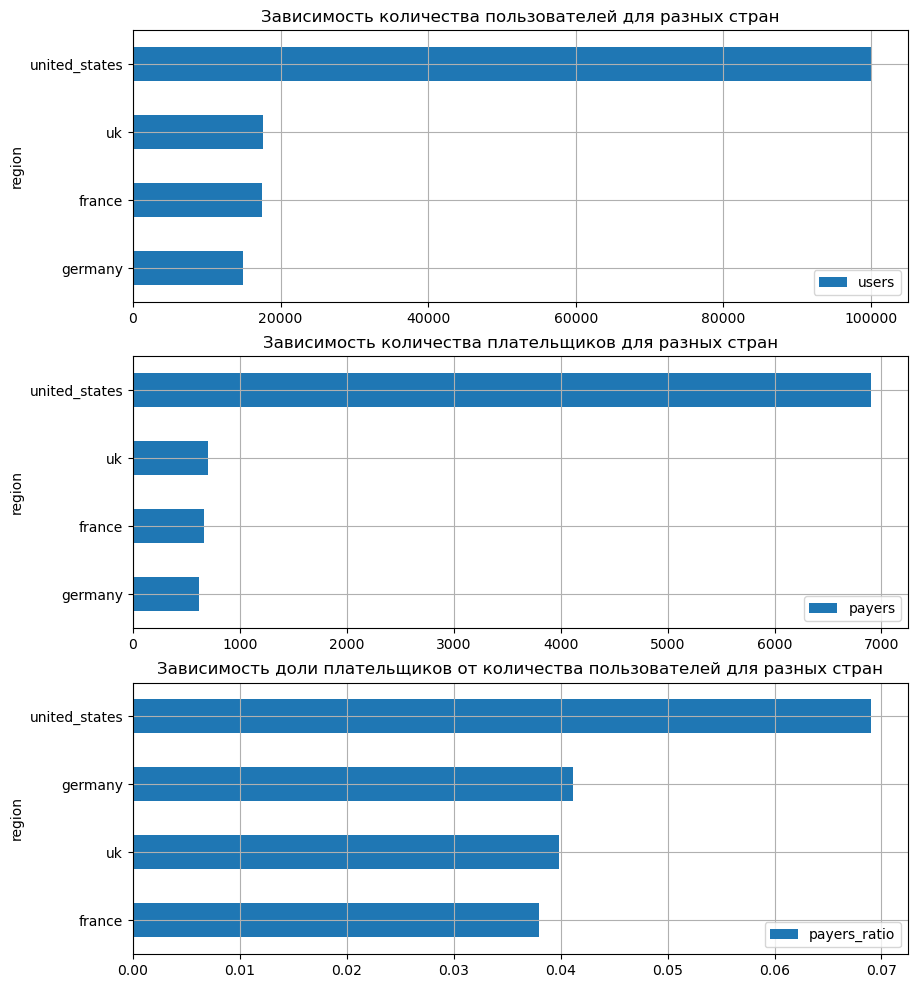

In [73]:
plt.figure(figsize=(10, 12))  # задаём размер сетки

ax1 = plt.subplot(3, 1, 1)
payers_by_region['users'].sort_values(ascending=True).plot(
        kind = 'barh',  # задаем тип диаграммы - горизонтальная столбчатая 
        grid = True,  # добавляем сетку
        legend = True,  # задаем легенду для оси Х
        ax = ax1
)
plt.title('Зависимость количества {} для разных стран'.format('пользователей'))  # даем название диаграмме

ax2 = plt.subplot(3, 1, 2)
payers_by_region['payers'].sort_values(ascending=True).plot(
        kind = 'barh',  # задаем тип диаграммы - горизонтальная столбчатая 
        grid = True,  # добавляем сетку
        legend = True,  # задаем легенду для оси Х
        ax = ax2
)
plt.title('Зависимость количества {} для разных стран'.format('плательщиков')),  # даем название диаграмме

ax3 = plt.subplot(3, 1, 3)
payers_by_region['payers_ratio'].sort_values(ascending=True).plot(
        kind = 'barh',  # задаем тип диаграммы - горизонтальная столбчатая 
        grid = True,  # добавляем сетку
        legend = True,  # задаем легенду для оси Х
        ax = ax3
)
plt.title('Зависимость доли {} от количества {} для разных стран'.format('плательщиков', 'пользователей')),  # даем название диаграмме


plt.show()

Видим что,

Приложение Procrastinate Pro+ пользуется наибольшей популярностью в США - пользователей из этой страны более 100 тысяч из суммарно чуть более 150 тысяч (150008): то есть две трети или 66.7%. Оставшаяся треть пользователей (50006) рапределена между тремя европейскими странами так: по 17 с половиной тысяч в Британии и Франции и 15 тысяч - в Германии.       
С учетом того распределения, которое мы считали как естественное (60% в США против 40% в Европе) распределение клиентов по регионам выглядит вполне нормальным - чуть больший приоритет США (на 7 %) вовсе не критичен, а скорее даже благоприятен.

Распределение количества плательщиков по странам демонстрирует доминирование плательщиков из США их 6902 из 8881 или 77.7%. Остальные страны распределены куда более равномерно: 700 плательщиков или 7.9% - в Британии, 663 (7.5%) во Франции и 616 (6.9%) - в Германии. 

Доминирование США количества плательщиков обусловлено большей долей плательщиков среди пользователей на этом рынке:     
в США доля плательщиков составляет 70%, а для европейских стран эта доля равна примерно 40%.

#### Проделаем аналогичное упражнение для устройств.

Таких устройств так-же как и стран 4: компьютеры - mac' и 'pc', а также смартфоны - 'iphone' и 'android

#### Построим теперь таблицу, отражающую количество пользователей и долю платящих для каждого устройства. 

Сделаем это абсолютно аналогично тому, как мы делали такую же таблицу по странам.

In [74]:
# Создаем табличку с количеством пользователей, 
# количеством плательщиков и долей плательщиков по устройствам
payers_by_device = profiles.groupby('device').agg({ 'user_id': 'count', 'payer': 'sum'})\
                    .sort_values(by=['user_id'],ascending=False)
payers_by_device.columns = ['users', 'payers']
payers_by_device['payers_ratio'] = payers_by_device['payers'] / payers_by_device['users']

# Смотрим что получилось
payers_by_device

users  payers  payers_ratio
device                              
iphone   54479    3382      0.062079
android  35032    2050      0.058518
pc       30455    1537      0.050468
mac      30042    1912      0.063644

Визуализируем результат горизонтальной столбчатой диаграммой

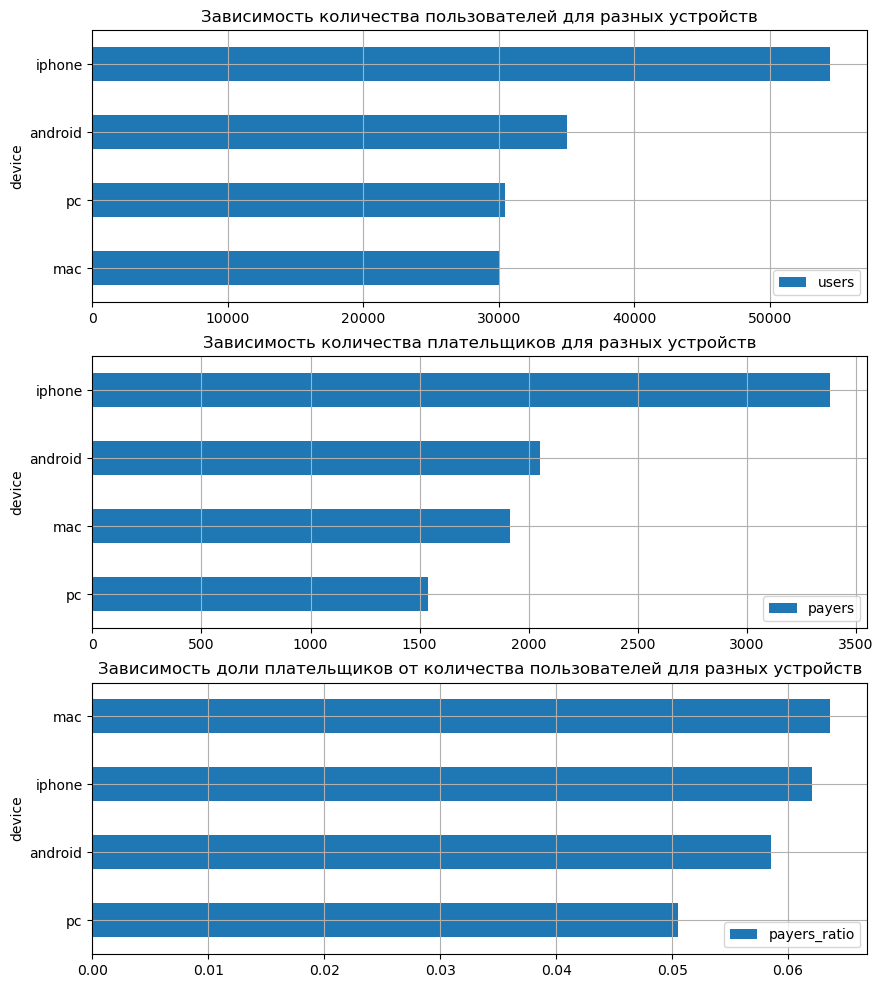

In [89]:
plt.figure(figsize=(10, 12))  # задаём размер сетки

ax1 = plt.subplot(3, 1, 1)
payers_by_device['users'].sort_values(ascending=True).plot(
        kind = 'barh',  # задаем тип диаграммы - горизонтальная столбчатая 
        grid = True,  # добавляем сетку
        legend = True,  # задаем легенду для оси Х
        ax = ax1
)
plt.title('Зависимость количества {} для разных устройств'.format('пользователей'))  # даем название диаграмме

ax2 = plt.subplot(3, 1, 2)
payers_by_device['payers'].sort_values(ascending=True).plot(
        kind = 'barh',  # задаем тип диаграммы - горизонтальная столбчатая 
        grid = True,  # добавляем сетку
        legend = True,  # задаем легенду для оси Х
        ax = ax2
)
plt.title('Зависимость количества {} для разных устройств'.format('плательщиков')),  # даем название диаграмме

ax3 = plt.subplot(3, 1, 3)
payers_by_device['payers_ratio'].sort_values(ascending=True).plot(
        kind = 'barh',  # задаем тип диаграммы - горизонтальная столбчатая 
        grid = True,  # добавляем сетку
        legend = True,  # задаем легенду для оси Х
        ax = ax3
)
plt.title('Зависимость доли {} от количества {} для разных устройств'.format('плательщиков', 'пользователей')),  # даем название диаграмме


plt.show()

Видим что,

Общее количество пользователей составляет те же самые 150008 человек (что косвенно подтверждает, что мы не ошиблись).

Наибольшее количество клиентов заходит в приложение с Айфонов - таких пользователей почти 54.5 тысячи или 36.3%. Остальные две трети пользователей распределены практически равномерно: 35 тысяч приходится на владельцев Андроид-смартфонов и по 30 тысяч - на обладателей компьютеров (MAC и PC).       
Если сопоставить это распределение с нашими предварительными прикидками (по 30% на андроиды, айфоны и РС и только 10% на МАС) - то следует признать, что приложение Procrastinate Pro+ пользуется наибольшей популярностью среди владельцев продукции Apple. Перекос в целом не критичен, однако владельцев МАС-ов все-таки многовато и возможно есть смысл поработать над активизацией привлечения пользователей РС.

Общее количество плательщиков так-же совпадает с результатами распределения по странам - 8881 человек.        
Распределение плательщиков по четырем категориям дивайсов в чем то повторяет распределение общего количества пользователей: на Айфоны приходится 38.1%, на Андроиды - 23.1%, на MAC - 21.5% и наконец на PC - 17.3%.

Доля плательщиков из общего количества пользователей распределена довольно равномерно: 6.2% для Айфонов, 5.9% для Андроида, 5.1% для PC, и несколько "выделяется" MAC - у него 6.4%.

#### Возможно есть смысл посмотреть на разбивку как по странам, так и по устройствам.

In [90]:
# Создаем табличку с количеством пользователей в разбивке по странам и устройствам 
users_by_region_and_device = profiles.pivot_table(
                                        index='device', columns='region', values = 'user_id', aggfunc= 'count'
                                        ).sort_values(by='united_states', ascending=False)
# Объединяем данные по европейским странам в одну колонку "europe"  и уберем лишнее
users_by_region_and_device['europe'] = users_by_region_and_device[['france', 'germany', 'uk']].sum(axis=1)
users_by_region_and_device.drop(columns=['france', 'germany', 'uk'], inplace=True) 

# Создаем табличку с количеством плательщиков в разбивке по странам и устройствам 
payers_by_region_and_device = profiles.pivot_table(
                                        index='device', columns='region', values = 'payer', aggfunc= 'sum'
                                        ).sort_values(by='united_states', ascending=False)
# Объединяем данные по европейским странам в одну колонку "europe"  и уберем лишнее
payers_by_region_and_device['europe'] = payers_by_region_and_device[['france', 'germany', 'uk']].sum(axis=1)
payers_by_region_and_device.drop(columns=['france', 'germany', 'uk'], inplace=True) 

# Смотрим что получилось
display(users_by_region_and_device)
display(payers_by_region_and_device)

region   united_states  europe
device                        
iphone           44529    9950
mac              24842    5200
android          20199   14833
pc               10432   20023

region   united_states  europe
device                        
iphone            2994     388
mac               1706     206
android           1487     563
pc                 715     822

Визуализируем результат тепловой диаграммой

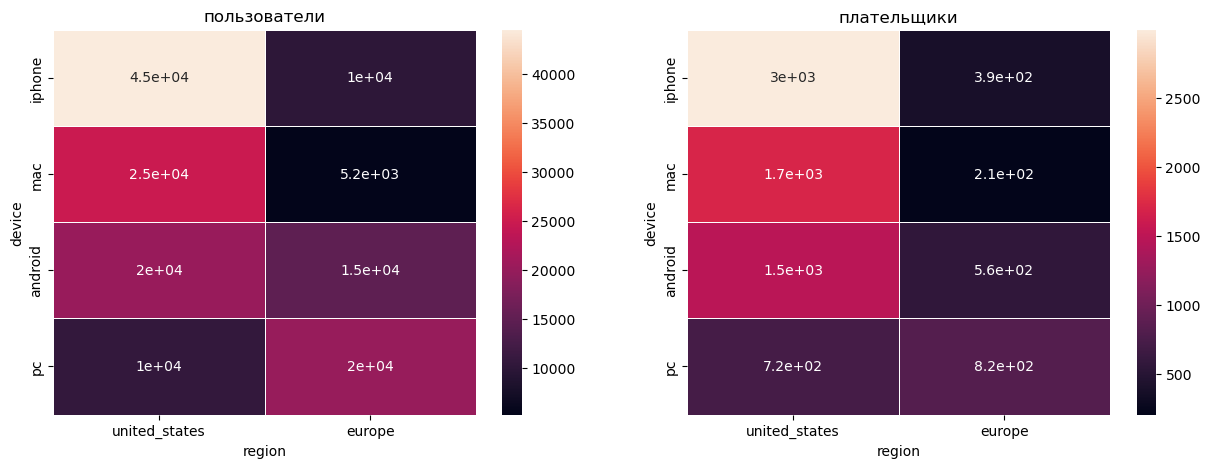

In [91]:
plt.figure(figsize=(15, 5))  # задаём размер сетки

ax1 = plt.subplot(1, 2, 1)
sns.heatmap(users_by_region_and_device, linewidths=.5, annot=True, ax = ax1 )
plt.title('пользователи')  # даем название диаграмме

ax2 = plt.subplot(1, 2, 2)
sns.heatmap(payers_by_region_and_device, linewidths=.5, annot=True, ax = ax2 )
plt.title('плательщики')  # даем название диаграмме


plt.show()

Выводы, сделанные ранее можно только подтвердить.
В дополнение можно сказать, что по тепловым картам видно, что рынки Америки и Европы в какой-то степени дополняют друг друга (с неким все-же перевесом в сторону США) в части большей склонности клиентов в США к гаджетам от Apple, а в Европе - к более открытым и демократичным Андроидам и РС. 

В результате пока мы не видим каких-то значительных перекосов в отношении рынков или используемых гаджетов, которые бы могли быть источником проблем с эффективностью. По всей видимости в этом отношении основное внимание нужно будет уделить именно источникам привлечения клиентов. 

#### Изучим теперь источники привлечения пользователей и определим каналы, из которых пришло больше всего платящих пользователей. 

Посмотрим на источники.

In [92]:
profiles['channel'].unique()

array(['faceboom', 'organic', 'adnonsense', 'yrabbit', 'mediatornado',
       'rocketsuperads', 'leapbob', 'tiptop', 'wahoonetbanner',
       'opplecreativemedia', 'lambdamediaads'], dtype=object)

Видим 10 различных рекламных агенств и 'organic' (то есть "самопришедшие" клиенты) 

#### Построим теперь таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения. 

Сделаем это так же, как мы делали для стран и гаджетов. Только добавим долю канала в количестве привлеченных пользователей и плательщиков за вычетом "самопришедших" (при этом нужно не забыть, что в этом случае данные для канала "organic" в этих столбцах будут некорректными).

In [93]:
# Создаем табличку с количеством пользователей, 
# количеством плательщиков и долей плательщиков по каналам привлечения
payers_by_channel = profiles.groupby('channel').agg({ 'user_id': 'count', 'payer': 'sum'})\
                    .sort_values(by=['user_id'],ascending=False)
payers_by_channel.columns = ['users', 'payers']
payers_by_channel['payers_ratio'] = payers_by_channel['payers'] / payers_by_channel['users']
payers_by_channel['chan_users_share'] = payers_by_channel['users'] / (users_total - 56439)
payers_by_channel['chan_payers_share'] = payers_by_channel['payers'] / (payers_total - 1160)

# Смотрим что получилось
payers_by_channel

users  payers  payers_ratio  chan_users_share  \
channel                                                             
organic             56439    1160      0.020553          0.603181   
faceboom            29144    3557      0.122049          0.311471   
tiptop              19561    1878      0.096007          0.209054   
opplecreativemedia   8605     233      0.027077          0.091964   
leapbob              8553     262      0.030633          0.091408   
wahoonetbanner       8553     453      0.052964          0.091408   
rocketsuperads       4448     352      0.079137          0.047537   
mediatornado         4364     156      0.035747          0.046639   
yrabbit              4312     165      0.038265          0.046084   
adnonsense           3880     440      0.113402          0.041467   
lambdamediaads       2149     225      0.104700          0.022967   

                    chan_payers_share  
channel                                
organic                      0.150240  
faceboom                     0.460692  
tiptop                       0.243233  
opplecreativemedia           0.030177  
leapbob                      0.033933  
wahoonetbanner               0.058671  
rocketsuperads               0.045590  
mediatornado                 0.020205  
yrabbit                      0.021370  
adnonsense                   0.056987  
lambdamediaads               0.029141

Визуализируем результат горизонтальной столбчатой диаграммой

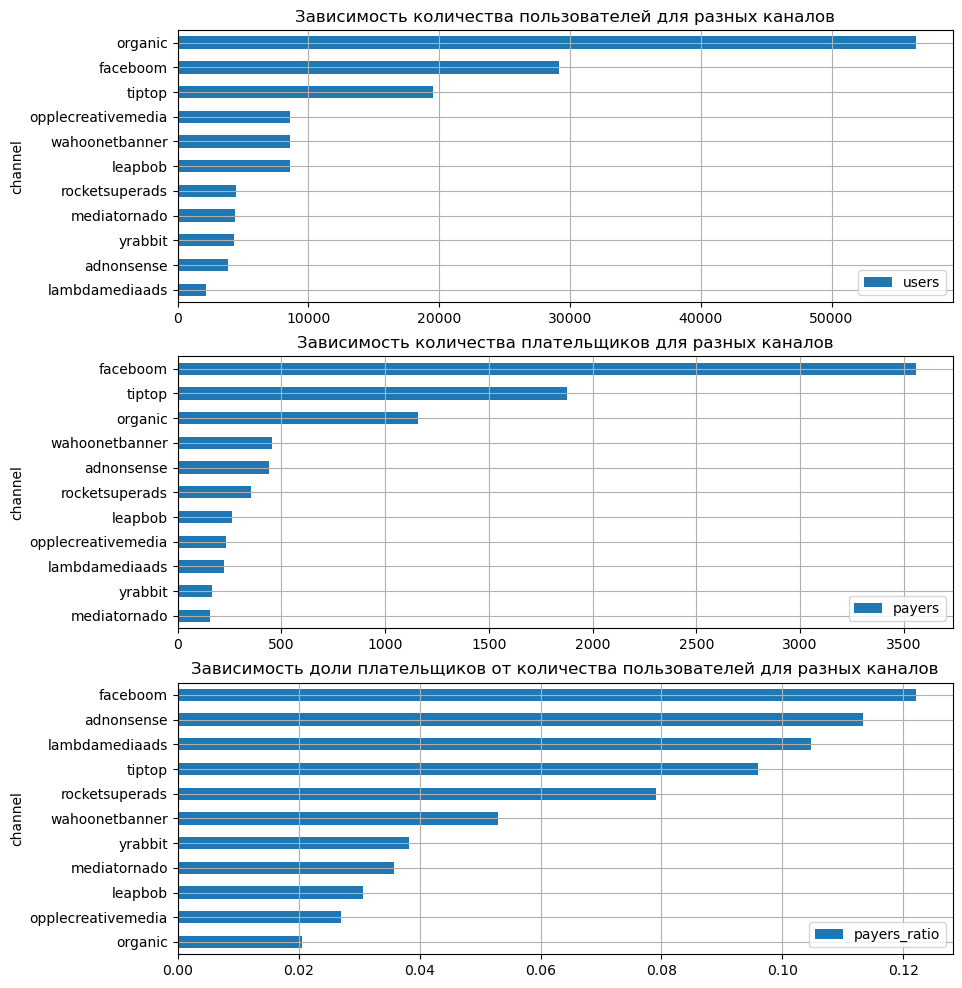

In [94]:
plt.figure(figsize=(10, 12))  # задаём размер сетки

ax1 = plt.subplot(3, 1, 1)
payers_by_channel['users'].sort_values(ascending=True).plot(
        kind = 'barh',  # задаем тип диаграммы - горизонтальная столбчатая 
        grid = True,  # добавляем сетку
        legend = True,  # задаем легенду для оси Х
        ax = ax1
)
plt.title('Зависимость количества {} для разных каналов'.format('пользователей'))  # даем название диаграмме

ax2 = plt.subplot(3, 1, 2)
payers_by_channel['payers'].sort_values(ascending=True).plot(
        kind = 'barh',  # задаем тип диаграммы - горизонтальная столбчатая 
        grid = True,  # добавляем сетку
        legend = True,  # задаем легенду для оси Х
        ax = ax2
)
plt.title('Зависимость количества {} для разных каналов'.format('плательщиков')),  # даем название диаграмме

ax3 = plt.subplot(3, 1, 3)
payers_by_channel['payers_ratio'].sort_values(ascending=True).plot(
        kind = 'barh',  # задаем тип диаграммы - горизонтальная столбчатая 
        grid = True,  # добавляем сетку
        legend = True,  # задаем легенду для оси Х
        ax = ax3
)
plt.title('Зависимость доли {} от количества {} для разных каналов'.format('плательщиков', 'пользователей')),  # даем название диаграмме


plt.show()

Видим что,

1. Наибольшее количество клиентов приходят сами по себе, без всякой рекламной "подсказки" - это категория "organic". Однако конверсия в плательщиков в этой категории самая низкая из всех (2.1%), хотя количество плательщиков все-таки довольно велико: 1160 человек, что является третим результатом. Если человек действительно хочет воспользоваться сервисом, никакая реклама ему не помешает.

2. Среди "рекламных" каналов выделяются две компании "faceboom" и "tiptop", дающие напару 52% "рекламных" (без учета органики) пользователей (48705 из 93569) и аж 70% "рекламных" плательщиков (5435 из 7721).

3. Лидером, является компания "faceboom" с привлеченными 29144 пользователями, из которых 3557 - плательщики. При этом эта компания имеет лучший показатель конверсии в 12.2%. 

4. Компания же "tiptop" привлекла 19561 клиента, из которых 1878 плательщики, а по показателю доли плательщиков занимает четвертое место из десяти (9.6%). 

Вполне вероятно, что лидерство этих двух компаний обусловлено тем, что именно на них выделялось существенно больше рекламных средств. На следующих этапах исследования это хорошо бы проверить, потому что, если это не так (денег выделялось столько же, сколько и остальным) - то эти компании демонстрируют поразительную эффективность.

5. Остальные каналы существенно уступают этим двум по всем показателям (суммарно меньше половины "рекламных" пользователей и только 30% "рекламных" плательщиков). 

6. Ближайший по объему привлечения пользователей "преследователь" - компания "opplecreativemedia" привлекла в 2 с лишним раза меньше клиентов, чем "tiptop" и при этом доля плательщиков у нее всего 2.7%.

7. С другой стороны в "хвосте" рейтинга по количеству привлеченных клиентов мы видим две компании - "adnonsense" и "lambdamediaads", у которых показатели количества привлеченных клиентов самые низкие (3880 и 2149 соответственно), зато доля плательщиков среди привлеченных клиентов сравнима с лидерами (11.3% и 10.5% соответственно).

Вполне возможно, что малое количество привлеченных клиентов у этих каналов вызвано низкими бюджетами, аллокированными на эти компании, а "качество" клиетской базы у этих компаний велико и возможно есть смысл в дальнейшем пересмотреть подход к финансированию этих источников.

8. Каналы, находящиеся на местах с 4-го по 8-е по всей видимости представляют собой "середняков", поставляя от 4 до 8.5 тысяч клиетов с уровнем кончерсии в плательщиков от 3% до 8%.

#### Посмотрим есть ли у каналов привлечения клиентов какая-либо специальзация по региону. 

Может быть какие-то компании работают только на рынке США или только на рынке Европы. Проверим.

In [95]:
# Создаем табличку с количеством пользователей в разбивке по странам и устройствам 
users_by_channel_and_region = profiles.pivot_table(
                                       index='channel', columns='region', values = 'user_id', aggfunc= 'count'
                                       ).sort_values(by='united_states', ascending=False)
# Объединяем данные по европейским странам в одну колонку "europe" и уберем лишнее
users_by_channel_and_region['europe'] = users_by_channel_and_region[['france', 'germany', 'uk']].sum(axis=1)
users_by_channel_and_region.drop(columns=['france', 'germany', 'uk'], inplace=True)
users_by_channel_and_region = users_by_channel_and_region.fillna(0)

users_by_channel_and_region

region              united_states   europe
channel                                   
organic                   38173.0  18266.0
faceboom                  29144.0      0.0
tiptop                    19561.0      0.0
rocketsuperads             4448.0      0.0
mediatornado               4364.0      0.0
yrabbit                    4312.0      0.0
adnonsense                    0.0   3880.0
lambdamediaads                0.0   2149.0
leapbob                       0.0   8553.0
opplecreativemedia            0.0   8605.0
wahoonetbanner                0.0   8553.0

In [96]:
channels_org = ['organic']
channels_usa = ['faceboom', 'tiptop', 'rocketsuperads', 'mediatornado', 'yrabbit']
channels_europe = ['adnonsense', 'lambdamediaads', 'leapbob', 'opplecreativemedia', 'wahoonetbanner']

Визуализируем результат тепловой диаграммой

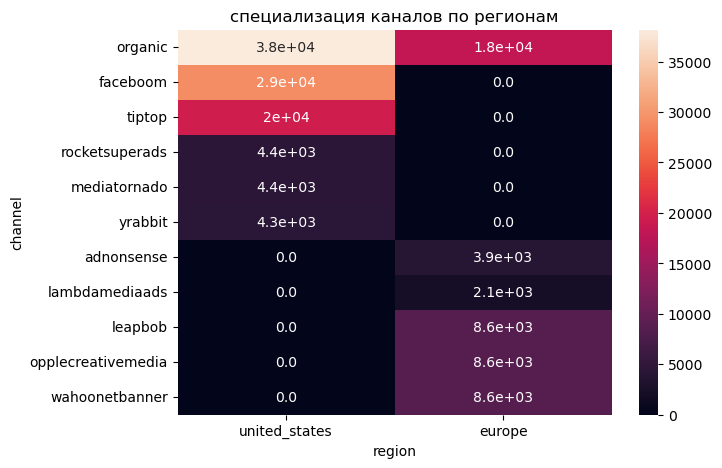

In [97]:
plt.figure(figsize=(7, 5))  # задаём размер сетки

sns.heatmap(users_by_channel_and_region, annot=True, fmt='.2')
plt.title('специализация каналов по регионам')  # даем название диаграмме

plt.show()

Видим, что 

У компаний, сотрудничающих с Procrastinate Pro+ на ниве привлечения клиентов имеется очень четкая региональная специальзация: 5 компаний работет на рынок США и 5 компаний - на рынок Европы (углубляться сейчас в специализацию по странам Европы наверное нет смысла, поскольку европейские страны похожи по показателям).          
При этом оба лидера привлечения (и по всей видимости лидера в части освоенного бюджета) - компании "faceboom" и "tiptop", дающие напару 52% "рекламных" пользователей работают исключительно на рынок США.         
Если в дальнейшем выяснится, что их работа недостаточно эффективна - у нас появляется вариант исправления ситуации за счет региональной диверсификации, потому что интуитивно кажется, что привлечение и удержание клиентов в США должно обходиться дороже.

Относительно органических клиентов: мы видим, что соотношение самопришедших в США и в Европе - 2 к 1 (38,1 к 18,3) . Это практически такое же соотношение, что и для "платных" клиентов ( 61.8 на 31.7) и соответственно - для всех клиентов ( 100 на 150). Скорее всего это связано с активностью компаний по привлечению клиентов и "сарафанным радио" от этих источников.    
Вполне разумным может оказаться предположение, что увеличение активности по привлечению "платных" клиентов на каком-либо рынке приводит к пропорциональному увеличению роста органических клиентов.

#### Посмотрим есть ли у каналов специальзация по типу и марке устройств. 

Крайне маловероятно, но в принципе возможно, что какие-то компании специализируются например только на продукции Apple. Проверим на всякий случай.

In [98]:
# Создаем табличку с количеством пользователей в разбивке по странам и устройствам 
users_by_channel_and_device = profiles.pivot_table(
                                       index='channel', columns='device', values = 'user_id', aggfunc= 'count'
                                       ).sort_values(by='pc', ascending=False)
# Объединяем данные по европейским странам в одну колонку "europe" и уберем лишнее
users_by_channel_and_device['iphone_&_mac'] = users_by_channel_and_device[['iphone', 'mac']].sum(axis=1)
users_by_channel_and_device['android_&_pc'] = users_by_channel_and_device[['android', 'pc']].sum(axis=1)
users_by_channel_and_device.drop(columns=['android', 'pc', 'iphone', 'mac'], inplace=True)
users_by_channel_and_device = users_by_channel_and_device.fillna(0)

users_by_channel_and_device

device              iphone_&_mac  android_&_pc
channel                                       
organic                    31946         24493
opplecreativemedia          2583          6022
wahoonetbanner              2567          5986
leapbob                     2571          5982
faceboom                   20261          8883
tiptop                     13660          5901
adnonsense                  1208          2672
lambdamediaads               674          1475
yrabbit                     2965          1347
rocketsuperads              3054          1394
mediatornado                3032          1332

Визуализируем результат тепловой диаграммой

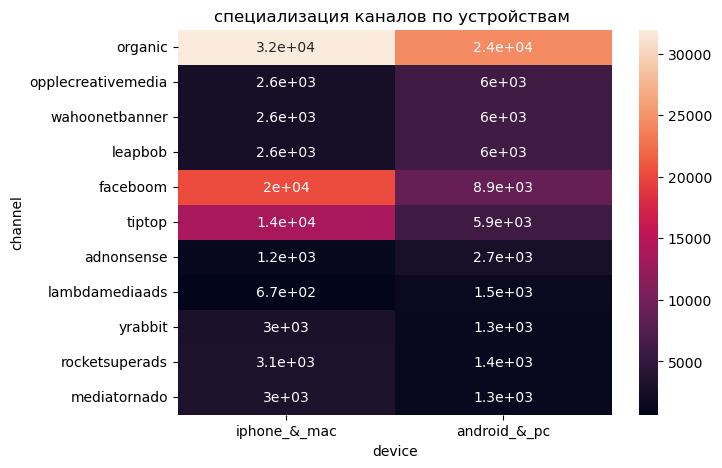

In [99]:
plt.figure(figsize=(7, 5))  # задаём размер сетки

sns.heatmap(users_by_channel_and_device, annot=True)
plt.title('специализация каналов по устройствам ')  # даем название диаграмме

plt.show()

По производителям устройств явной специализации не наблюдается.

Видимый перекос в сторону продукции Apple есть и по всей видимости он вызван активностью лидеров - компании "faceboom" и "tiptop": помимо концентрации на американском рынке, на котором популярность продукции Apple выше, чем в Европе и в остальном мире, эти компании по всей видимости имеют предпочтение к этим типам устройств .

Распределение органических клиентов так-же смещено в сторону айфонов и мас-ов и наверное причина этого та же: активность лидеров привлечения на американском рынке.

Представляется, что в дальнейшем в исследовании нужно будет больше уделить внимание эффективности работы каналов привлечения по регионам и меньше концентрироваться на специфике устройств: если будут найдены пути улучшения эффективности каналов в регионах (в частности более ровное распределение средств по каналам и между регионами) перекосы с устройсвами будут нивелированы автоматически.

## Шаг 4. Маркетинг.

#### Посчитаем общую сумму расходов на маркетинг.

Для расчета общей суммы достаточно просуммировать данные столбца "costs" для всего датафрейма costs и для двух его частей.

In [100]:
# Считаем по всем клиентам
costs_total = round( costs['costs'].sum(), 2) 

# Считаем по клиентам из США
costs_usa = round( costs[costs['channel'].isin(channels_usa) ]['costs'].sum(), 2)

# Считаем по клиентам из Европы
costs_europe = round( costs[costs['channel'].isin(channels_europe) ]['costs'].sum(), 2)

# Смотрим что получилось
print('Суммарные затраты на привлечение пользователей -', costs_total)
print('Затраты на привлечение пользователей из США -', costs_usa)
print('Затраты на привлечение пользователей из Европы -', costs_europe)

Суммарные затраты на привлечение пользователей - 105497.3
Затраты на привлечение пользователей из США - 90928.6
Затраты на привлечение пользователей из Европы - 14568.7


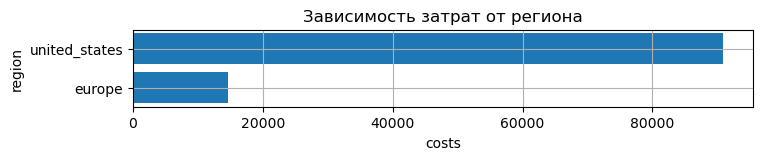

In [101]:
reg = ['europe', 'united_states']
cost_reg = [costs_europe, costs_usa]

plt.figure(figsize=(8, 1))  # задаем размер диаграммы
plt.barh( reg, cost_reg) # задаем значения диаграммы
plt.grid(True)  # добавляем сетку
plt.xlabel('costs'),  # задаем наименование для оси X
plt.ylabel('region'),  # задаем наименование для оси Y
plt.title('Зависимость затрат от региона')  # даем название диаграмме

plt.show()

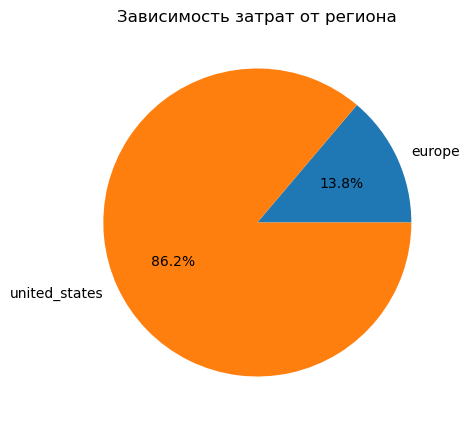

In [120]:
plt.figure(figsize=(5, 5))  # задаем размер диаграммы
plt.pie(cost_reg, labels= reg, autopct='%1.1f%%') # задаем значения

plt.title('Зависимость затрат от региона')  # даем название диаграмме

plt.show()

Итак,       
Общие затраты на рекламу в рассматриваемый период составили 105 тысяч 497 долларов и 30 центов.      
Из них 90 тысяч 928 долларов и 60 центов было направлено на привлечение пользователей из США,      
и 14 тысяч 568 долларов и 70 центов - на привлечение европейских пользователей.     
Таким образом из общей суммы бюджета на США аллокировано 86,2%, а на Европу осталось 13,8%.     
Это соотношение видится довольно завышенным "в пользу" США.

#### Посмотрим,  как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

Для этого сгруппируем тот же самый датафрейм costs по столбцу "channel" и просуммируем данные столбца "costs" уже для каждого источника.       
Так-же есть смысл добавить столбец с процентной долей каждого источника в общих затратах.

In [111]:
# Группируем и считаем
costs_by_channel = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)
costs_by_channel['chan_cost_share'] = costs_by_channel['costs'] / costs_total

# Смотрим что получилось
costs_by_channel

costs  chan_cost_share
channel                                      
tiptop              54751.30         0.518983
faceboom            32445.60         0.307549
wahoonetbanner       5151.00         0.048826
adnonsense           3911.25         0.037074
opplecreativemedia   2151.25         0.020392
rocketsuperads       1833.00         0.017375
leapbob              1797.60         0.017039
lambdamediaads       1557.60         0.014764
mediatornado          954.48         0.009047
yrabbit               944.22         0.008950

Визуализируем результат горизонтальной столбчатой диаграммой

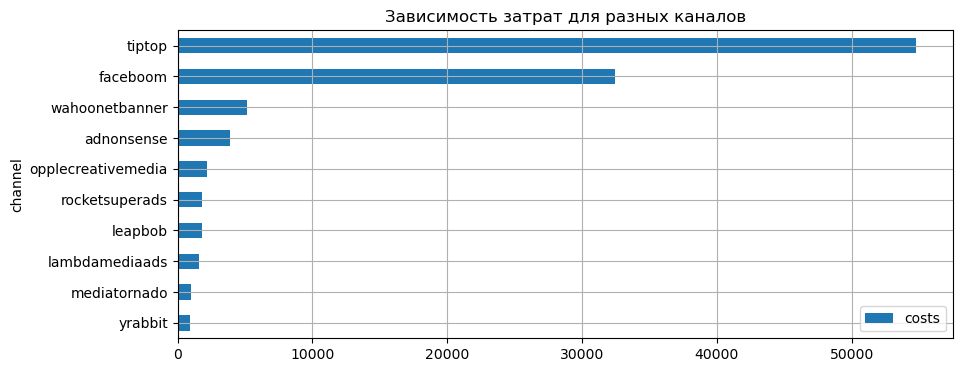

In [112]:
costs_by_channel['costs'].sort_values(ascending=True).plot(
        kind = 'barh',  # задаем тип диаграммы - горизонтальная столбчатая 
        grid = True,  # добавляем сетку
        legend = True,  # задаем легенду для оси Х
        figsize=(10, 4)  # задаем размер диаграммы
)
plt.title('Зависимость затрат для разных каналов')  # даем название диаграмме

plt.show()

Видим что,

Как мы и предполагали ранее из 105 с половиной тысяч долларов расходов на рекламу львиную долю получили компании "faceboom" и "tiptop". Суммарно на них было аллоцировано 82% рекламного бюджета. При этом мы помним, что с точки зрения привлечения эти две компании дали напару только 52% "рекламных" (без учета органики) пользователей и 70% "рекламных" плательщиков, что видится несколько неэффективным.     Основной причиной суммарной неэффективности лидеров видится именно компания  "tiptop". Она является лидером по затратам - на нее было аллоцировано аж 51% рекламного бюджета. А показатели привлечения у нее довольно скромные: 21% среди "рекламных" пользователей и 24% плательщиков. Складывается впечатление, что этот канал как минимум менее эффективен, чем многие другие имеющиеся в наличии.    
Компания же "faceboom" похоже демонстрирует довольно среднюю эффективность: через нее было потрачено 31% бюджета, а привлечено те же 31% пользователей, хотя с точки зрения плательщиков все совсем неплохо - 46%.      
Следует так-же учитывать, что оба лидера работают только на рынке США и преимущественно с владельцами Айфонов и МАС-ов.

Остальные каналы существенно уступают этим двум по доле бюджета: на ближайшего "преследователя" - компанию "wahoonetbanner" (а это крупнейший "привлекатель клиентов" на европейском рынке) было аллоцировано всего чуть менее 5% рекламного бюджета.    

По поводу двух компаний - "adnonsense" и "lambdamediaads", которые находятся в "хвосте" рейтинга по количеству привлеченных клиентов и на которые мы обращали внимание как на компании, привлекающие довольно "качественную" аудиторию можно добавить следующее:
затраты бюджета на "adnonsense" составляют 3.7% от суммарных - это 4-е место, при этом доля компании в привлечении пользователей составляет 4.2%, что все-же выше, чем у лидера - компании "faceboom" (особенно с учетом отмеченной ранее весьма неплохой доли плательщиков).      
Компания же "lambdamediaads" имеет всего 1.5% в затратах бюджета, привлекая как мы отмечали 2.2% пользователей и 2.9% плательщиков и поэтому может считаться потенциально весьма перспективным каналом привлечения. Однако она не может выступать заменой менее эффективным лидерам на рынке США, поскольку специализируется только на Европе.

Компании, находящиеся на местах с 5-го по 10-е "потребляют" от 1.5% до 2% рекламного бюджета каждая. При этом как мы помним привлекая от 4% до 9% пользователей, что опять же видится более эффективным с точки зрения вложений рекламного бюджета.
В случае если они в состоянии эффективно "переварить" большие суммы.

Однако это соображения очень предварительные - вопросы эффективности будем анализировать дальше подробнее.

#### Посмотрим на динамику изменения расходов по каждому источнику во времени. 

Для этого распределим сгруппируем данные в датафрейме costs не только по источникам, но и по неделям и месяцам и построим графики динамики затрат.

In [113]:
# Выделяем номера недель и месяцев
costs_in_time = costs
costs_in_time['week'] = costs_in_time['dt'].dt.isocalendar().week
costs_in_time['month'] = costs_in_time['dt'].dt.month

# Добавляем регион
costs_in_time['region'] = str()
costs_in_time.loc[costs_in_time['channel'].isin(channels_usa), 'region'] = 'unided_states'
costs_in_time.loc[costs_in_time['channel'].isin(channels_europe), 'region'] = 'europe'

# Смотрим что получилось
costs_in_time

dt         channel  costs  week  month         region
0    2019-05-01        faceboom  113.3    18      5  unided_states
1    2019-05-02        faceboom   78.1    18      5  unided_states
2    2019-05-03        faceboom   85.8    18      5  unided_states
3    2019-05-04        faceboom  136.4    18      5  unided_states
4    2019-05-05        faceboom  122.1    18      5  unided_states
...         ...             ...    ...   ...    ...            ...
1795 2019-10-23  lambdamediaads    4.0    43     10         europe
1796 2019-10-24  lambdamediaads    6.4    43     10         europe
1797 2019-10-25  lambdamediaads    8.8    43     10         europe
1798 2019-10-26  lambdamediaads    8.8    43     10         europe
1799 2019-10-27  lambdamediaads   12.0    43     10         europe

[1800 rows x 6 columns]

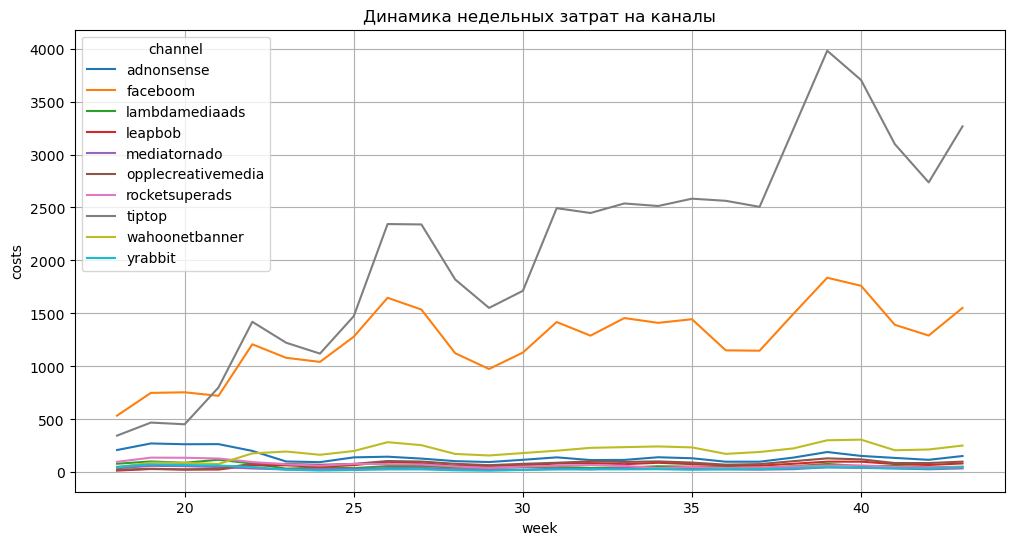

In [114]:
# Строим график динамики затрат по неделям для всех каналов
costs_in_time.pivot_table(
    index='week', # в стороках расположим недели
    columns='channel', # в столбцах расположим каналы
    values='costs', # в ячейках будут затраты
    aggfunc=sum     # суммированные по каналу и по неделе
).plot(
    figsize=(12, 6),  # задаем размер графика
    grid=True  # добавляем сетку
)
plt.ylabel('costs'),  # задаем наименование для оси Y
plt.title('Динамика недельных затрат на каналы')  # задаем название диаграммы

plt.show()

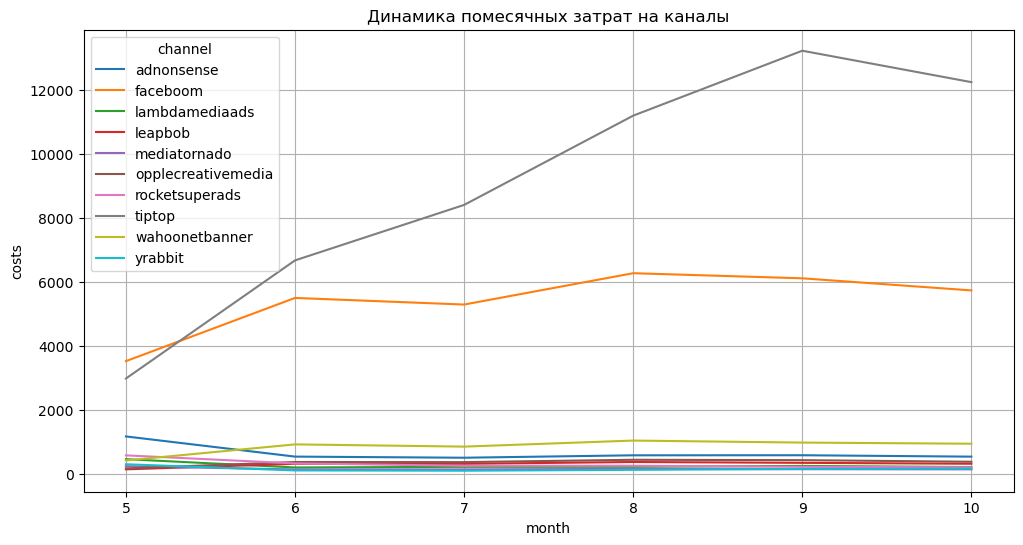

In [115]:
# Строим график динамики затрат по месяцам для всех каналов
costs_in_time.pivot_table(
    index='month', # в стороках расположим недели
    columns='channel', # в столбцах расположим каналы
    values='costs', # в ячейках будут затраты
    aggfunc=sum     # суммированные по каналу и по неделе
).plot(
    figsize=(12, 6),  # задаем размер графика
    grid=True  # добавляем сетку
)
plt.ylabel('costs'),  # задаем наименование для оси Y
plt.title('Динамика помесячных затрат на каналы')  # задаем название диаграммы

plt.show()

#### Поскольку каналы четко делятся по регионам, посмотрим какова динамика затрат на США и Европу.

Для этого сгруппируем данные в датафрейм costs_in_time по столбцу "region".

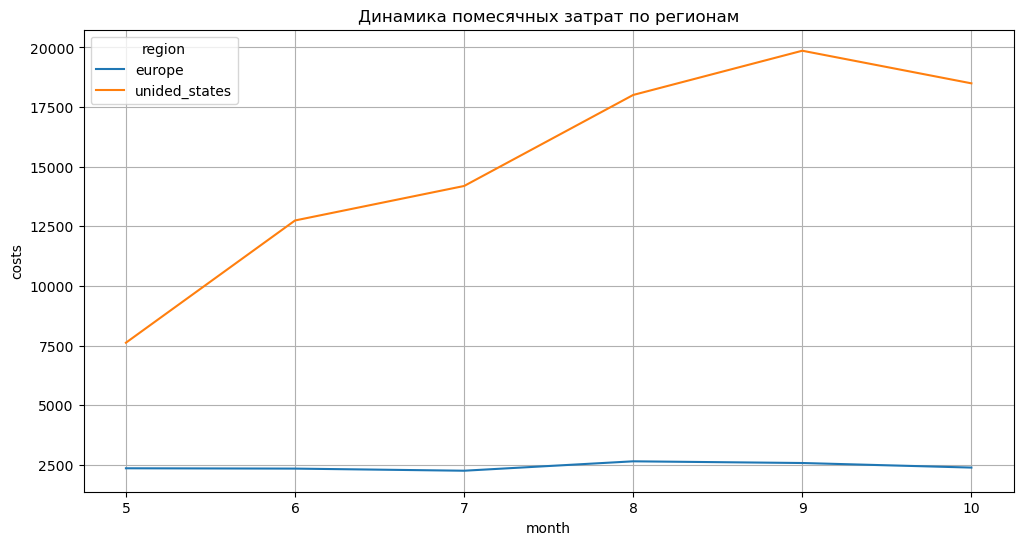

In [116]:
# Строим график динамики затрат по месяцам
costs_in_time.pivot_table(
    index='month', # в стороках расположим недели
    columns='region', # в столбцах расположим каналы
    values='costs', # в ячейках будут затраты
    aggfunc=sum     # суммированные по каналу и по неделе
).plot(
    figsize=(12, 6),  # задаем размер графика
    grid=True  # добавляем сетку
)
plt.ylabel('costs'),  # задаем наименование для оси Y
plt.title('Динамика помесячных затрат по регионам')  # задаем название диаграммы

plt.show()

Видим что,

На графиках видим что как мы и отмечали ранее из общей массы каналов выделяются два: "faceboom" и "tiptop", на которые расходуется львиная доля средств.

По этим двум "лидерам видно", что затраты последовательно нарастают с мая по сентябрь включительно, выходя на платто (и даже несколько снижаясь) в Октябре.       
На недельном графике видим несколько всплесков финансирования: в конце Мая, в конце Июня и в конце Сентября. По всей видимости первый из них связан просто с нарастанием активности в начале кампании, а два других связаны с закрытием кварталов и соответственно с необходимостью реализовать средства, запланированные на текущий квартал.

Поскольку доля остальных каналов в сумме распределения рекламных затрат существенно меньше, чем у двух лидеров - их графики находятся сильно ниже, расположены плотнее и выделить какие-либо тенденции для них существенно сложнее.     
В большинстве своем они повторяют динамику лидеров с незначительными вариациями (например для компании "adnonsense", которая получила основную часть финансирования в самом начале проекта и в дальнейшем получала существенно меньше).

По агрегированной динамике по регионам видно, что из-за особенностей динамики в каналах, которые описаны выше суммарно затраты в регионе США не просто выше ( что мы уже отмечали ранее) но они еще и демонстрируют сущетсвенный рост с Мая по Сентябрь включительно, в то время как затраты на каналы в Европе не показывают роста совсем.

#### Посчитаем сколько в среднем стоило привлечение одного пользователя ( параметр CAC) из каждого источника. 

Для этого будем использовать созданные нами ранее профили пользователей: сгруппируем данные во фрейме profiles по столбцу "channel" и посчитаем среднее по столбцу "acquisition_cost" (в нем мы как раз считали затраты на одного клиента) для каждого канала.     
Для того, чтобы легче было анализировать добавим еще столбец с суммарными затратами на канал, которые мы считали ранее (но только теперь и их посчитаем на базе фрейма profiles)

In [117]:
# Формируем табличку
cac_by_channel = profiles.groupby('channel').agg({'region': 'first', 'acquisition_cost': 'sum'})
cac_by_channel.loc[cac_by_channel['region'].isin(['germany', 'france', 'uk']), 'region'] = 'europe'
cac_by_channel['cac'] = profiles.groupby('channel').agg({'acquisition_cost': 'mean'})
cac_by_channel = cac_by_channel.sort_values(by='cac', ascending=False)\
                .rename(columns={'acquisition_cost': 'total_costs'})

# Смотрим что получилось
cac_by_channel

region  total_costs       cac
channel                                                 
tiptop              united_states     54751.30  2.799003
faceboom            united_states     32445.60  1.113286
adnonsense                 europe      3911.25  1.008054
lambdamediaads             europe      1557.60  0.724802
wahoonetbanner             europe      5151.00  0.602245
rocketsuperads      united_states      1833.00  0.412095
opplecreativemedia         europe      2151.25  0.250000
yrabbit             united_states       944.22  0.218975
mediatornado        united_states       954.48  0.218717
leapbob                    europe      1797.60  0.210172
organic                    europe         0.00  0.000000

Заодно посчитаем среднюю стоимость привлечения клиента для всех каналов и по регионам

In [122]:
# Считаем по всем клиентам
cac_total = round( cac_by_channel['cac'].mean(), 2)

# Считаем по клиентам из США
cac_usa = round( cac_by_channel[cac_by_channel.index.isin(channels_usa) ]['cac'].mean(), 2)

# Считаем по клиентам из Европы
cac_europe = round( cac_by_channel[cac_by_channel.index.isin(channels_europe) ]['cac'].mean(), 2)

# Смотрим что получилось
print('Средняя стоимость привлечения клиента для всех каналов -', cac_total)
print('Средняя стоимость привлечения клиента из США -', cac_usa)
print('Средняя стоимость привлечения клиента из Европы -', cac_europe)

Средняя стоимость привлечения клиента для всех каналов - 0.69
Средняя стоимость привлечения клиента из США - 0.95
Средняя стоимость привлечения клиента из Европы - 0.56


Визуализируем распределение CAC по каналам горизонтальной столбчатой диаграммой

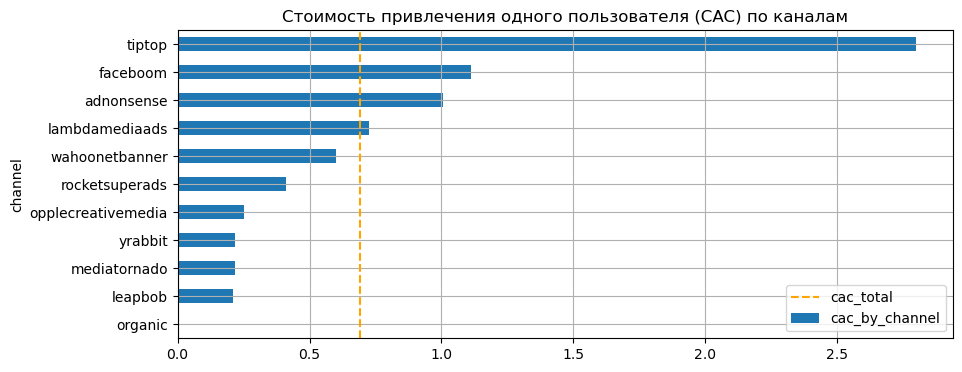

In [123]:
# Строим график затрат на привлечение в разных каналах
cac_by_channel['cac'].sort_values(ascending=True).plot(
        kind = 'barh',  # задаем тип диаграммы - горизонтальная столбчатая 
        grid = True,  # добавляем сетку
        figsize=(10, 4),  # задаем размер диаграммы
        label='cac_by_channel'  # задаем легенду для оси Х
)
plt.axvline(x=cac_total, color='orange', linestyle='--', label='cac_total')  # задаем уровень среднего для всех каналов
plt.legend()  # включаем легенду
plt.title('Стоимость привлечения одного пользователя (CAC) по каналам')  # даем название диаграмме

plt.show()

И по регионам

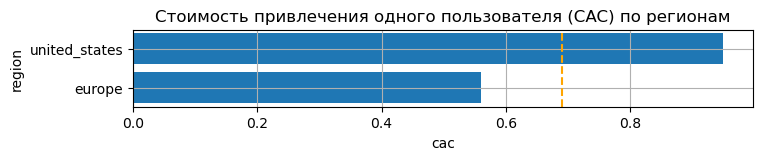

In [124]:
# Задаем параметры для графиа затрат на привлечение в двух регионах
reg = ['europe', 'united_states']
cost_reg = [cac_europe, cac_usa]

plt.figure(figsize=(8, 1))  # задаем размер диаграммы
plt.barh( reg, cost_reg) # задаем значения диаграммы
plt.grid(True)  # добавляем сетку
plt.xlabel('cac'),  # задаем наименование для оси X
plt.ylabel('region'),  # задаем наименование для оси Y
plt.axvline(x=cac_total, color='orange', linestyle='--', label='cac_total')  # задаем уровень среднего
plt.title('Стоимость привлечения одного пользователя (CAC) по регионам')  # даем название диаграмме

plt.show()

Теперь у нас появилось несколько больше информации для продолжения рассуждений по поводу основного вопроса проекта:     
Почему несмотря на огромные вложения в рекламу, последние несколько месяцев компания Procrastinate Pro+ терпит убытки.

Прежде всего отметим региональный аспект: привлечение одного клиента в США на 70% дороже, чем в Европе. Думается, что это в немалой степени обусловлено теденциями, задаваемыми прежде всего "лидерами", о чем чуть ниже.

На графике распределения стоимости привлечения одного пользователя (CAC) в различных каналах мы видим, что оба "лидера" по расходам бюджета - компании "faceboom" и "tiptop", котрые освоили 82% рекламного бюджета имеют САС существенно выше среднего:       
для компании "faceboom" это соотношение составляет 1.11 к 0.69 долларов, то есть САС в этом канале в 1.6 раза выше, чем в среднем по всем каналам и в два раза выше цены привлечения клиента в Европе;      
для компании "tiptop" это соотношение и вовсе составляет 2.80 к 0.69 долларов, то есть в этом канале САС в 4.1 раза выше, чем в среднем по всем каналам и в 5 раз выше чем в Европе.Таким образом только с этим каналом компания заплатила 52% бюджета с эффективностью привлечения в 4 раза ниже среднего.

По всей видимости такое распределение бюджета и я вляется основной причиной убытков.

Следует так-же отметить, что два "аутсайдера" по привлечению клиентов - компании "lambdamediaads" и "adnonsense", в отношении которых мы отмечали довольно "качественную" базу привлекаемых ими клиентов (с высоким уровнев конверсии в плательщиков) - эти два канала привлечения оказались так-же "дороже" среднего: уровни САС для них 0.73 и 1.0 долларов соответственно.     
По всей видимости это закрывает вопрос об их "перспективности" с точки зрения перераспределения бюджета на привлечение.

С другой стороны лучшие показатели по затратам на одного клиента ( с примерно одинаковыми уровнями затрат) показали следующие 3 компании: "yrabbit" (22 цента), "mediatornado" (22 цента) и "leapbob" (21 цент). Показатель САС у этих компаний ниже среднего в 3 раза.  При этом одна из них - "mediatornado" работает на Американском рынке и может рассматриваться как прямой конкурент "лидерам", а вторая -  "leapbob" работает в Европе и может рассматриваться как некая перспектива с точки зрения региональной диверсификации.         
Сопоставимые с ними показатели так-же имеет "opplecreativemedia" (25 центов), так-же работающей на Европейском рынке.   
Так-же ниже среднего показатель стоимости привелчения у компаний "rocketsuperads" (41 цент) - американский сегмент и "wahoonetbanner" (60 центов) - европейский сегмент. 

Вполне возможно, что перераспределение бюджета в пользу этих компаний в той или иной конфигурации может выправить ситуацию с доходностью.

Однако для того, чтобы делать более обоснованные выводы нужно еще более внимательно посмотреть динамику параметров окупаемости (конверсию, удержание, LTV, ROI).

## Шаг 5. Оценка окупаемости рекламы.

Приступая к оценкам параметров окупаемости прежде всего стоит определиться с тем, есть ли смысл учитывать в расчетах органических клиентов или их стоит исключить.    
Предлагается учесть тот факт, что по всей видимости ситуация с окупаемостью проекта у компании Procrastinate Pro+ напряженная, а так-же тот факт, что канал "organic" вносит значительный вклад в приток клиентов и похоже "ведет себя" сходно с большинством "платных" каналов привлечения.     
Поэтому пока не будем исключать канал "organic" из рассмотрения.

В соответвтсвии с условиями, данными заказчиком в описании проекта, будем считать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.      
На основании этого определим observation_date и horizon_days

In [130]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

#### Сначала посмотрим что происходит с  удержанием пользователей.

Для этого используем ранее "заготовленную" функцию get_retention(). При этом не будем исключать из рассмотрения органических пользователей.

In [131]:
# Рассчитываем удержание всех клиентов
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days )

# Смотрим что получилось на примере retention
retention

cohort_size    0         1         2         3         4         5  \
payer                                                                       
False       134200  1.0  0.176811  0.086356  0.051468  0.034493  0.024516   
True          8420  1.0  0.404751  0.316746  0.259739  0.226841  0.209264   

              6         7         8         9        10        11        12  \
payer                                                                         
False  0.018443  0.013994  0.011818  0.009478  0.007750  0.006610  0.005872   
True   0.187767  0.173634  0.162589  0.150950  0.149406  0.137173  0.133373   

             13  
payer            
False  0.004575  
True   0.121496

Построим графики удержания для платящих и не платящих клиентов вне зависисмости от других параметров.        
Для этого используем так-же "заготовленную" функцию plot_retention() на основе только что полученных данных.

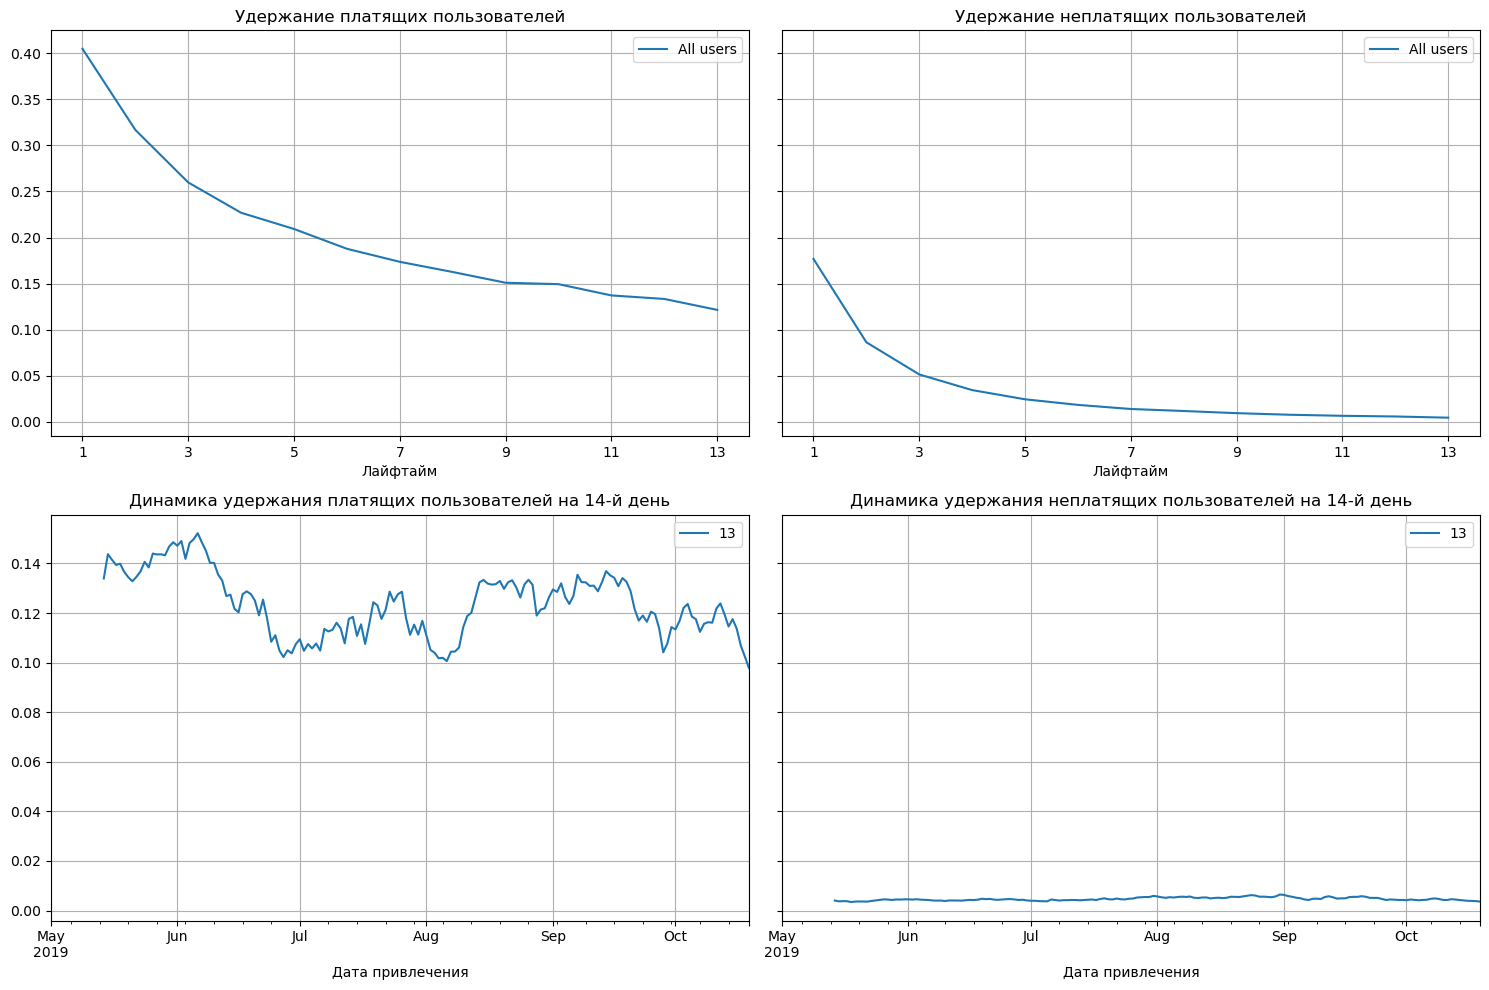

In [132]:
plot_retention(retention, retention_history, horizon_days,window=14)

Видим, что:

Показатели удержания платящих клиентов существенно  превосходят показатели для неплатящих:        
уровень удержания для плательщиков с уровня 40% в первый день плавно снидается до уровня 12% на 14 день,       
в то время как для неплатящих клиентов уровень удержания уже в первый день составляет только 17% и существенно быстрее падает практически до нуля к 14 дню.

Динамика удержания на 14 день среди плательщиков показывает колебания (возможно сезонные) снижаясь с 15% в начале Июня до 10% в Июле и Августе, затем несколько увеличиваясь до 13% в Сентябре - начале Октября и затем снижаясь к концу рекламной кампании.

Посмотрим нет ли серьезных различий в уровне удержания в зависимости от страны, используемого устройства или канала привлечения клиента.

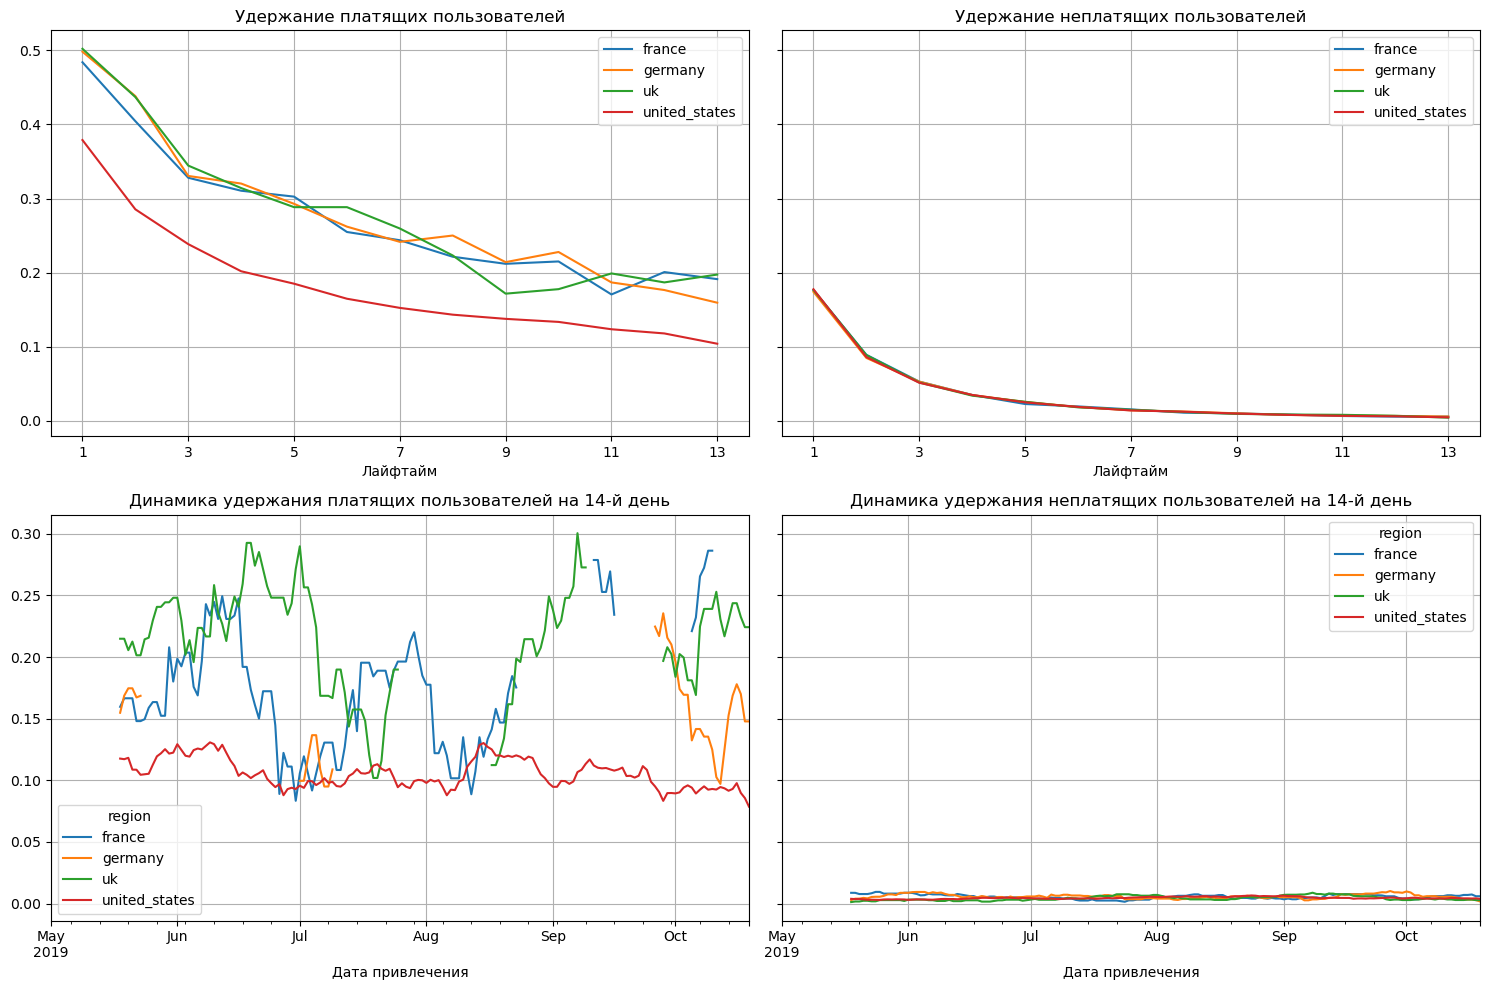

In [133]:
# Рассчитываем удержание в разбивке по странам
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region'] )

# Строим графики удержания в разбивке плательщик/нет по странам
plot_retention(retention, retention_history, horizon_days, window=18)

Видим, что:

Показатели удержания для платящих пользователей из Европейских стран заменто выше, чем для США:        
уровень удержания для них с уровня 49-50% в первый день плавно снижается до уровня 17-19% на 14 день,       
в то время как клиентов из США уровень удержания в первый день составляет только 37% и снижается к 14 дню до уровня 10%. Таким образом разница в уровнях удержания на 14-й день составляет 7-9% "в пользу" европейских платящих клиентов.    

Показатели неплатящих клиентов практически не отличаются по странам. 

Динамика удержания на 14 день среди плательщиков показывает, что у пользователей из Европы существенно более высокая волотильность колебаний, тем не менее уровень удержания для них практически ни в какой период не снижается ниже уровня удержания для клиентов из США.

Динамика по неплательщикам не показывает различий по странам оставаясь околонулевой на протяжении всего срока кампании.


Посмотрим теперь на зависимость удержания от используемого устройства.

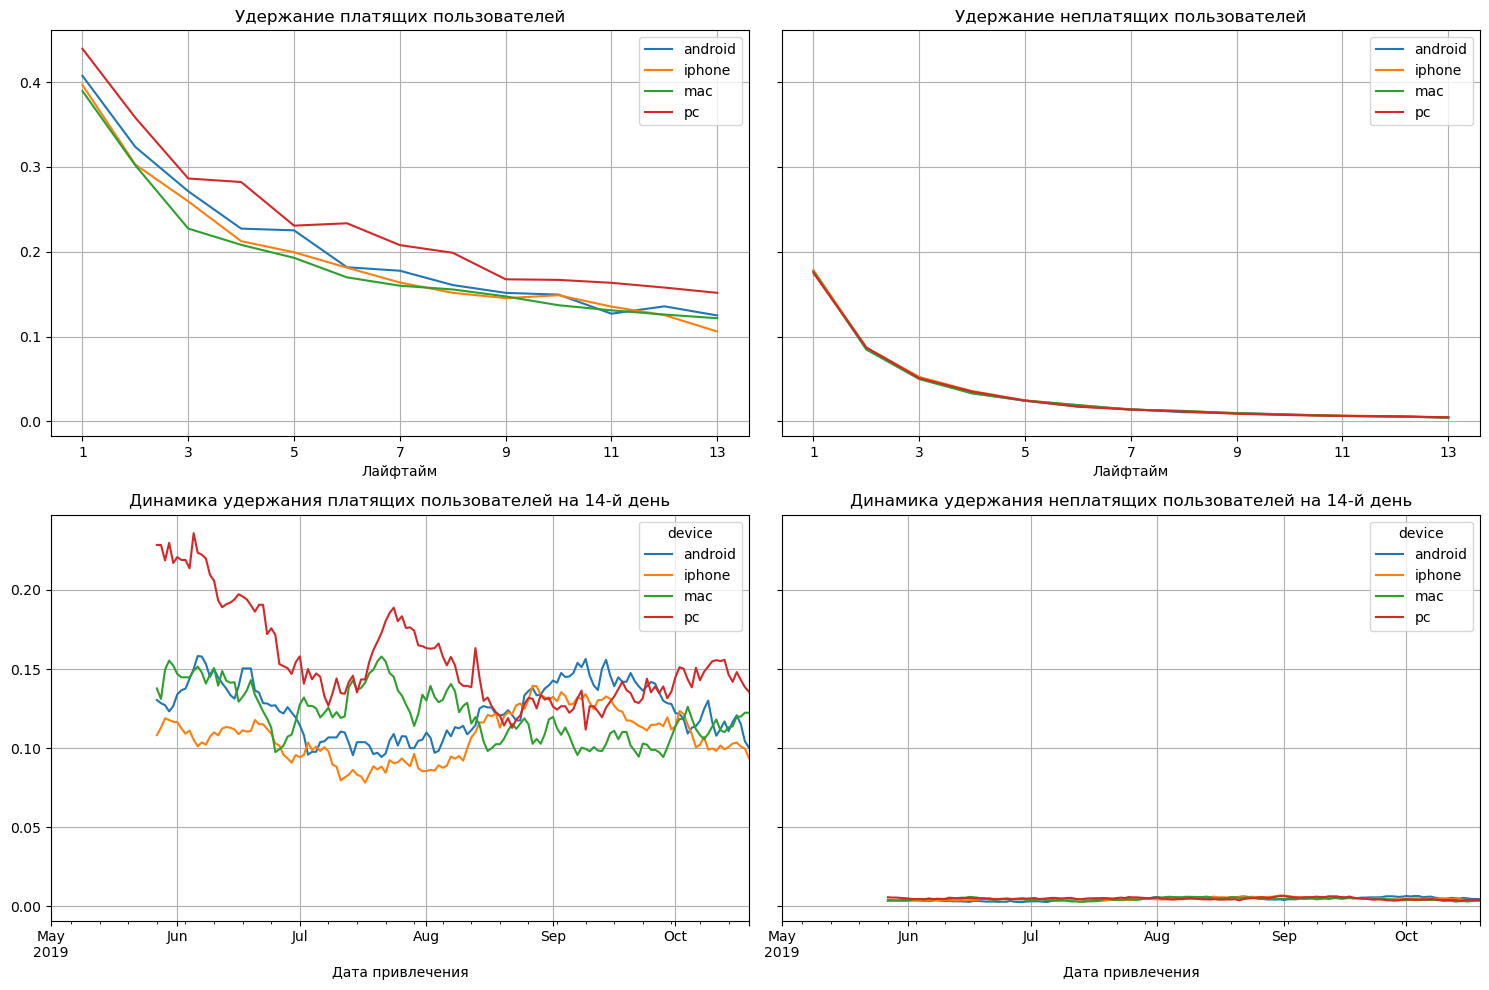

In [134]:
# Рассчитываем удержание в разбивке по устройствам
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device'] )

# Строим графики удержания в разбивке плательщик/нет по устройствам
plot_retention(retention, retention_history, horizon_days, window=27)

Видим, что:

Картина показателей удержания плательщиков существенно более ровная, чем в разбивке по странам - разница между "лидером" - пользователями РС и "аутсайдером" - пользователями Айфонов как в первый день, так и в 14 день составляет около 4% (43% к 39% в первый день и 15% к 11% на 14 день).     

Динамика уровня удержания плательщиков показывает, что владельцы РС показывают лучшие показатели удержания на всем интервале времени проведения кампании, в то время как остальные категории периодически меняются местами, оставаясь практически всегда ниже пользователей РС.

Графики по неплатящим пользователям полностью соответствуют предыдущему пункту: уровень удержания по экспаненте быстро снижается до нуля с 17-18% в первый день до практически нуля на 14 день и демонстрируя полную стабильность на горизонте исследуемого полугода. 

Посмотрим влияет ли на удержание канал привлечения.

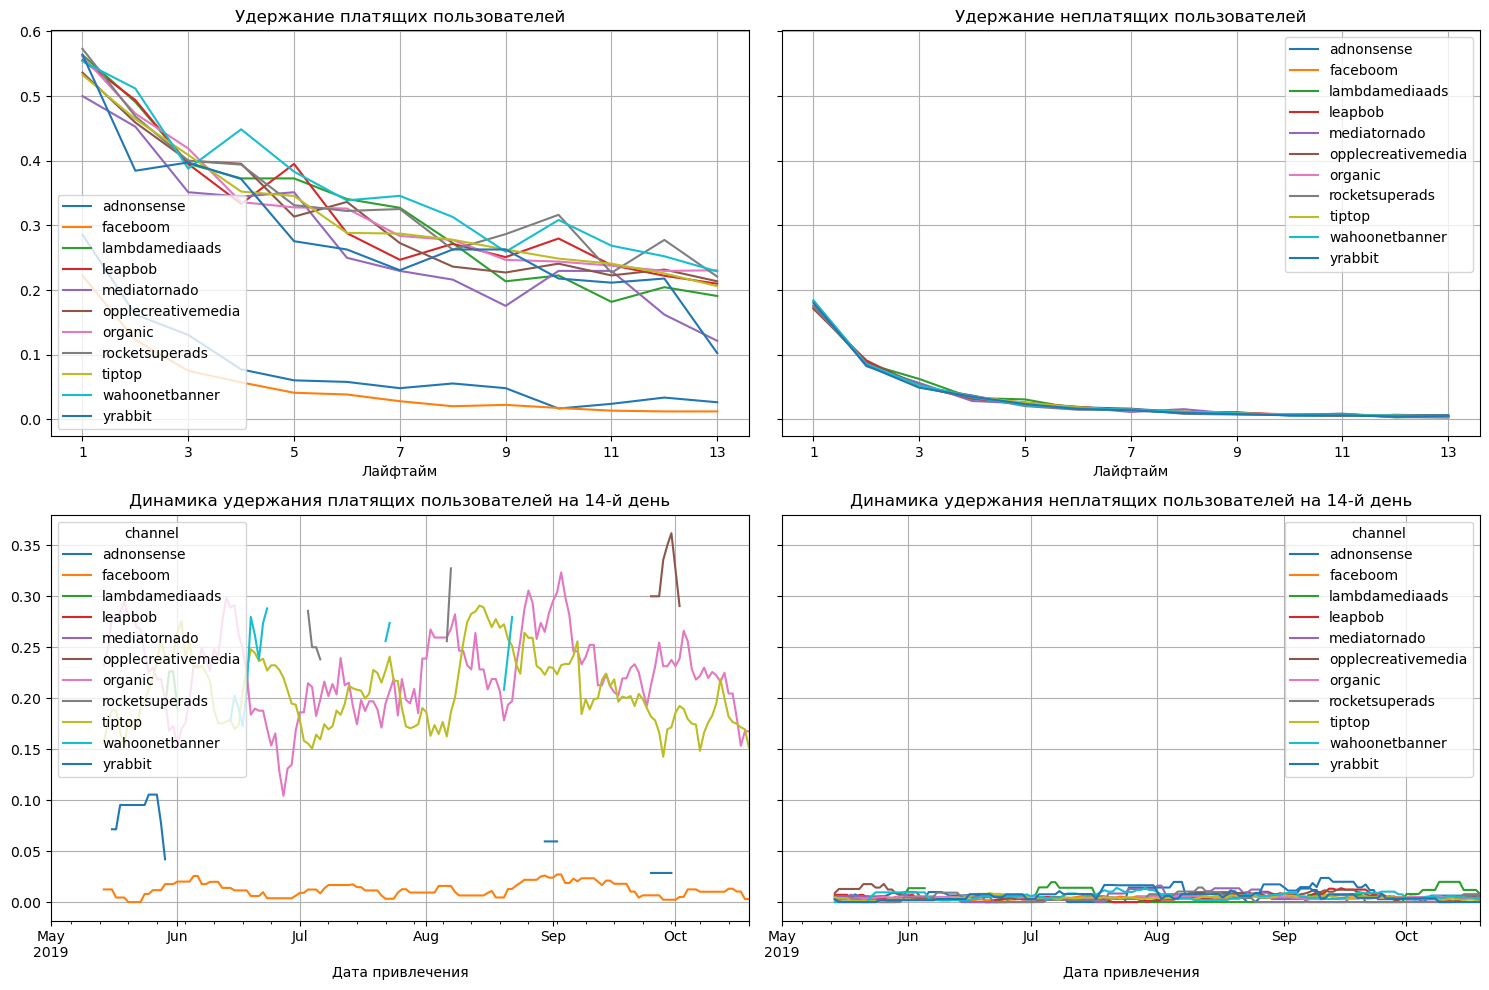

In [135]:
# Рассчитываем удержание в разбивке по каналам
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel'] )

# Строим графики удержания в разбивке плательщик/нет по каналам
plot_retention(retention, retention_history, horizon_days, window=14)

Видим, что:

Картина с неплатящими пользователями остаётся стабильной: ноль не зависит ни от чего.

График уровня удержания плательщиков по лайфтайму показывает, что пользователи, привлеченные через компании "faceboom" (один из лидеров на американском рынке) и "adnonsense" (один из лидеров по объему бюджета на европейском рынке) обладают существенно меньшим уровнем удержания, чем клиенты, привлеченные через остальные каналы. Разница в уровне сохраняется довольно значительной с первого по 14 день примерно на уровне 20%, начинаясь с уровня в 23% и 29% соответственно в первый день и завершаясь на уровне 10% и 20% соответственно на 14 день.   
Остальные каналы привлечения (включая органических клиентов) сгруппированы довольно плотно "стартуя" с уровня 50-57% в первый день и "финишируя" с показателями 10-22% на 14 день.

Динамика уровня удержания плательщиков показывает, что картина, при которой "faceboom" и "adnonsense" показывают существенно меньший уровень удержания сохраняется на протяжении всего полугодичного интервала. При этом компания "faceboom" демонстрирует существенно меньший уровень волатильности, чем "adnonsense", оставаясь стабильно плохой на протяжении всего срока кампании привлечения.

Однако информации пока все-же недостаточно, чтобы сделать обоснованные выводы. Сморим дальше.

#### Теперь посмотрим как выглядит картина конверсии пользователей в плательщиков интегрально и в разбивке по  странам, используемым устройствам и каналам привлечения.

Для этого используем ранее "заготовленную" функцию get_conversion() и как и прежде не будем исключать из рассмотрения органических пользователей. Параметры observation_date и horizon_days остаются прежними.

In [136]:
# Рассчитываем конверсию по всем клиенским группам сразу
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days )

# Смотрим что получилось на примере conversion
conversion

cohort_size      0.0       1.0       2.0       3.0       4.0  \
cohort                                                                    
All users       142620  0.04092  0.046705  0.049516  0.051522  0.052973   

                5.0       6.0       7.0       8.0       9.0      10.0  \
cohort                                                                  
All users  0.053898  0.054677  0.055392  0.055946  0.056458  0.056738   

               11.0      12.0      13.0  
cohort                                   
All users  0.056977  0.057145  0.057369

Построим графики конверсии для платящих и не платящих клиентов вне зависисмости от других параметров.        
Для этого используем так-же "заготовленную" функцию plot_conversion().

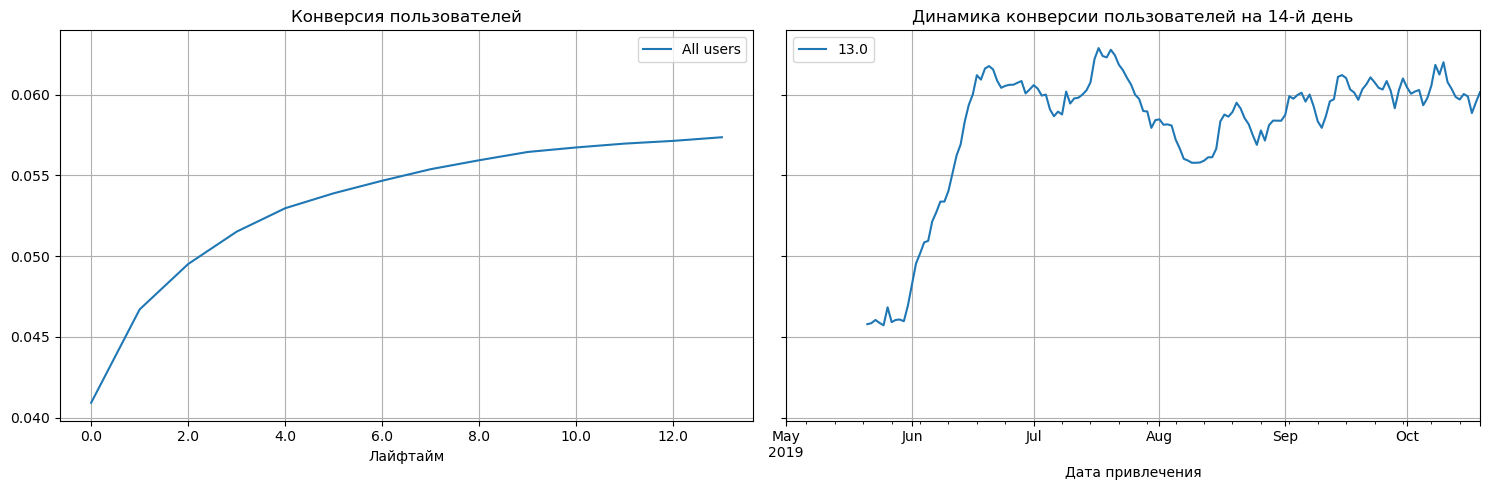

In [137]:
plot_conversion(conversion, conversion_history, horizon_days, window=21)

Видим, что:

Уровень конверсии возрастает в логарифмическом темпе от уровня 4.2% в первый день до уровня в 5.5% на 14-й день.

Динамика конверсии показывает резкий рост уровня конверсии на 14 день в Июне с уровня 4.6% до уровня около 6.0% и затем сохраняется примерно на этом уровне в течение всего срока кампании с колебаниями вокруг него в пределах +-0.4%.

Посмотрим нет ли серьезных различий в уровне конверсии в зависимости от страны, используемого устройства или канала привлечения клиента.

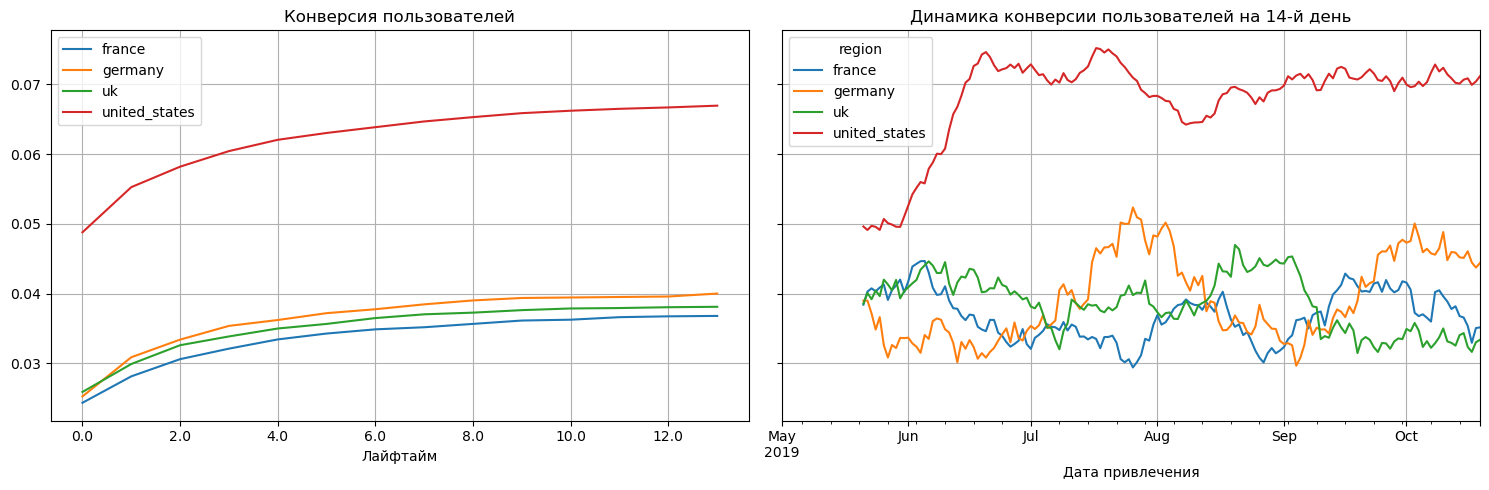

In [138]:
# Рассчитываем конверсию в разбивке по странам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region'] )

# Строим графики удержания в разбивке плательщик/нет по странам
plot_conversion(conversion, conversion_history, horizon_days, window=21)

Видим, что:

Уровень конверсии для США значительно - в 1.6-1.7 раза выше, чем в Европе ( 6.8% против 3.8-4.0%). С учетом разницы в поведении платящих и неплатящих клиентов, котрую мы видели на графиках удержания можно говорить о том, что рынок США по всей видимости можно считать приоритетным несмотря на "более дорогих" клиентов на этом рынке.

Динамика конверсии показывает         
Резкий рост уровня конверсии на 14 день в Июне для рынка США с уровня 5.0% до уровня около 7.0% и затем сохраняется примерно на этом уровне в течение всего срока кампании с колебаниями вокруг него в пределах +-0.4%.        
Для рынков Европы динамика конверсии показвает для всех трех стран ее стагнацию на уровне около 4% на протяжении всего полугодичного периода с колебаниями вокруг отметки 4% с амплитудой примерно +-1.2%. Отличаются страны только по фазе этих колебаний (например в то время как у Франции и Британии график сразу идет вверх в конце Мая-начале Июня, у Германии он идет вниз и таки остается в основном "в противофазе" двум другим на протяжении всего срока кампании). 

Посмотрим теперь на зависимость конверсии от используемого устройства.

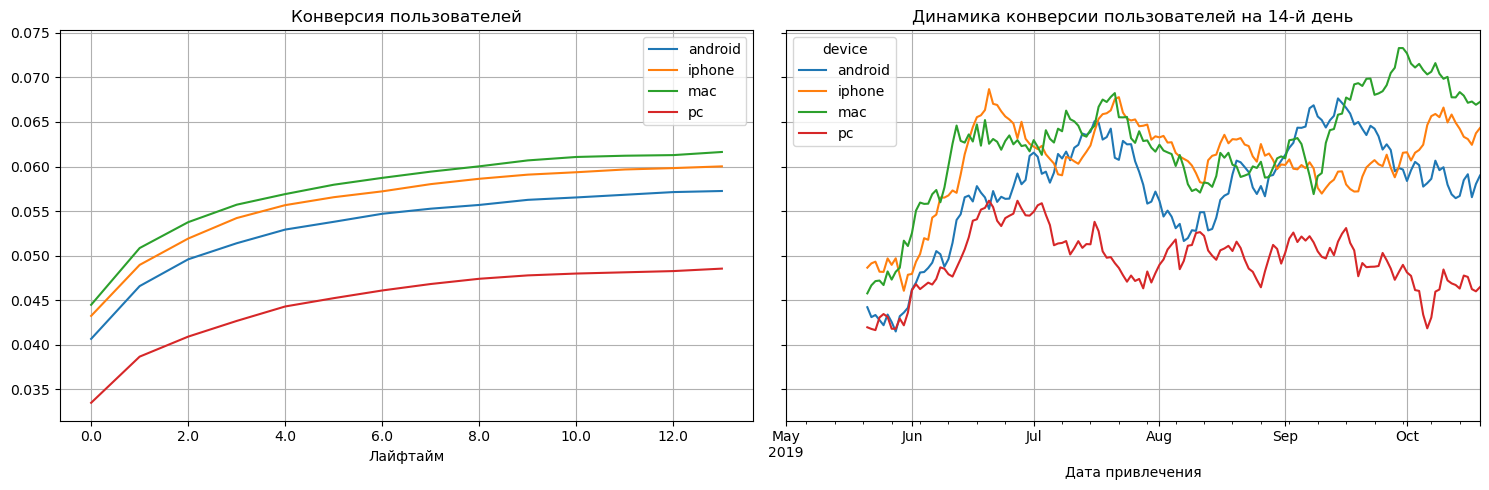

In [139]:
# Рассчитываем конверсию в разбивке по устройствам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device'] )

# Строим графики удержания в разбивке плательщик/нет по устройствам
plot_conversion(conversion, conversion_history, horizon_days, window=21)

Видим, что:

Уровень конверсии для пользователей РС уступает уровням конверсий для пользователей остальных трех устройств (4.8% против 5.4% у Андроид-сматрфонов, 6.0% у пользователей Айфонов и 6.2% у владельцев МАС-ов. 

Вид графиков динамики конверсии у всех групп примерно один и тот-же: рост в период конец Мая - Июнь с 4.2-4.8% до уровня от 4.8-5.0% у РС и около 6.0-6.5% у остальных гаджетов, затем колебания вокруг этих значений с амплитудой около +-1%


Посмотрим насколько различаются уровни конверсии в разных каналах привлечения.

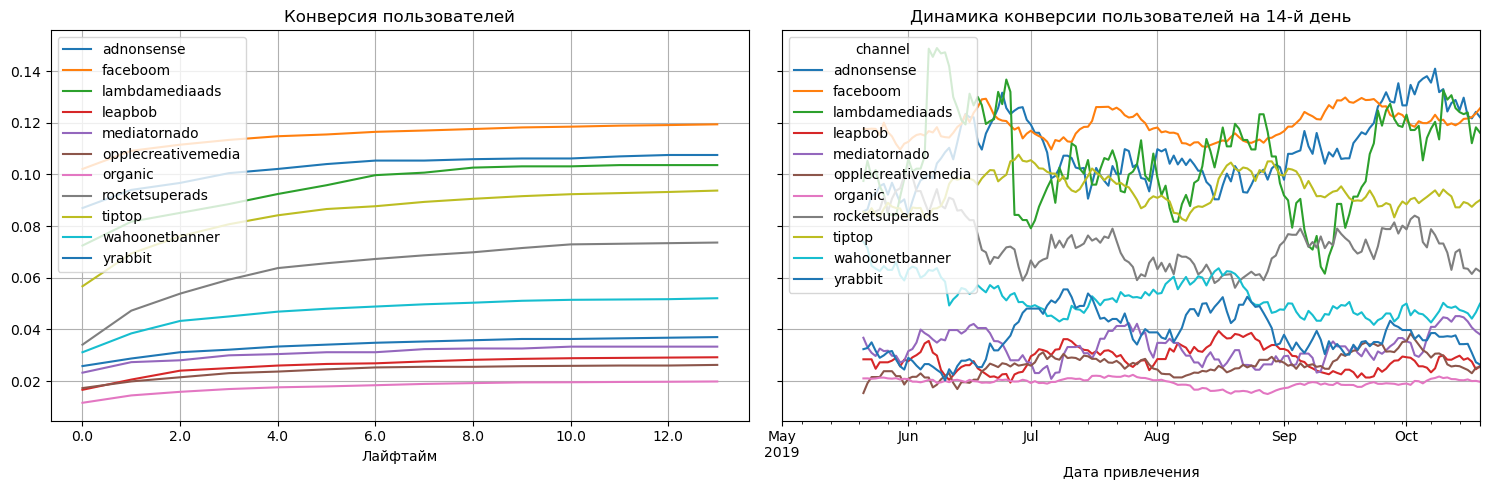

In [140]:
# Рассчитываем конверсию в разбивке по каналам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel'] )

# Строим графики удержания в разбивке плательщик/нет по каналам
plot_conversion(conversion, conversion_history, horizon_days, window=21)

Больше графиков, больше информации, запутаннее ситуация...

Ожидаемо все графики конверсии ведут себя сходно: имеют логарифмический вид, поднимаясь примерно в 1.5 раза от первгого до 14-го дня.

Так-же ожидаемо самый низкий уровень конверсии - на уровне около 2% - у органических клиентов.         

Среди же "платных" каналов можно примерно выделить четыре группы:           
- лидер - компания "faceboom" (представитель рынка США) с уровнем конверсии на 14-й день в 12%, что более чем вдвое превосходит среднюю конверсию на 14-й день по всем каналам;     
- преследователи с уровнем конверсии на 14-й день близким к 10%. Это три компании: "adnonsense" ( европейский рынок) с уровнем конверсии 10.7%, "lambdamediaads" ( европейский рынок) с уровнем конверсии в 10.2% и "tiptop" ( американский рынок) с уровнем 9.5%;       
- серднячки с уровнем 5-8% - это компании "rocketsuperads" ( американский рынок) с уровнем конверсии в 7.5% и "wahoonetbanner" ( европейский рынок) с уровнем 5.2%;      
- ну и наконец 4 компании, которые можно записать в отстающие по показателю конверсии. Это компании: "yrabbit" ( амер.) с уровнем 3.7%, "mediatornado" ( амер.) с 3.4%, "leapbob" ( евр.) с 3.0%, и "opplecreativemedia" ( евр.) - 2.8%.

По динамике конверсии можно лишь отметить довольно высокую волатильность уровня конверсии во времени у компаний "adnonsense" и "lambdamediaads", которые колебались с "размахом" более +-2.5-3.0%.       
Остальные компании показывали большую стабильность отклоняясь не 1-1.5% по ходу кампании. 


Пока опять сказать определенно что-либо трудно: плохое удержание, зато хорошая конверсия, дорого, но возможно эффективно...
Нужно смотреть параметры LTV и ROI, они должны внести ясность. 

#### Рассчитаем и посмотрим на LTV и ROI для всех клиентов без разбивки по странам, гаджетам и каналам.

Для этого используем "заготовленную" функцию get_ltv_roi() с пустым параметром "dimensions".

In [141]:
# Рассчитываем
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles, orders, observation_date, horizon_days )

# Смотрим что получилось
ltv_grouped

cohort_size       0.0       1.0       2.0       3.0       4.0  \
cohort                                                                     
All users       142620  0.241267  0.310905  0.364073  0.408661  0.447512   

                5.0       6.0       7.0       8.0       9.0      10.0  \
cohort                                                                  
All users  0.481909  0.513263  0.541481  0.569211  0.594565  0.617813   

               11.0      12.0      13.0  
cohort                                   
All users  0.639767  0.661289  0.680757

Построим графики LTV, ROI, CAC а так же их динамики.        
Для этого используем так-же "заготовленную" функцию plot_ltv_roi() на основе только что полученных данных.

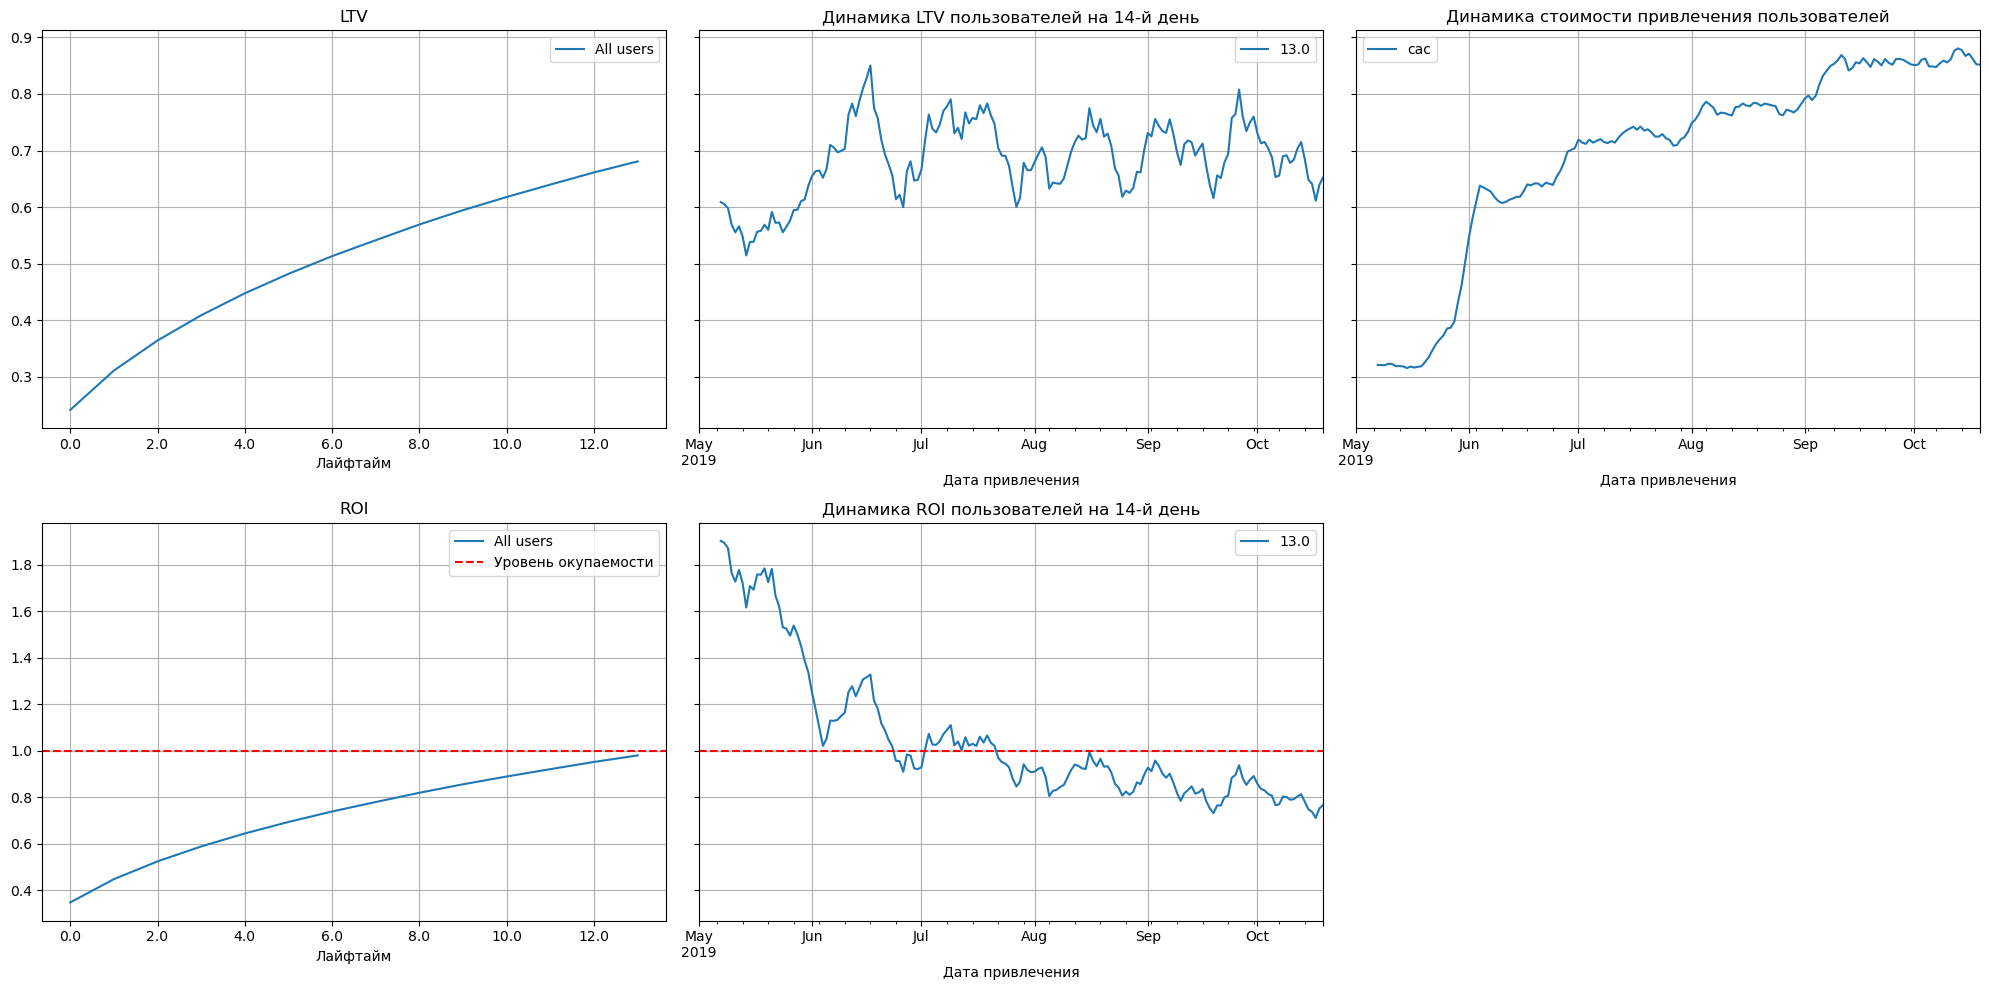

In [142]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам видим, что:

Реклама действительно не окупается.    
ROI в конце второй недели — приближается, но немного не достигает 100%.    
Как мы и отмечали ранее CAC увеличивается на протяжении проекта от уровня около 32 центов в начале до 88 центов в Октябре.     
При этом LTV показывает относительно стабильную динамику на протяжении всей длительности кампании колеблясь около 70 +- 10 центов.

Такая динамика LTV и CAC влечет постепенное снижение ROI. При этом ROI остается в "положительной" (выше уровня окупаемости) зоне только в Мае и первой половине Июня, затем сваливаясь в "отрицательную" зону и оставаясь там до конца кампании с отрицательной при этом динамикой. 

Чтобы подробнее разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, устройству и возможно главное - источнику первого посещения.

#### Проанализируем LTV и ROI в разбивке по странам.

Для этого используем функцию get_ltv_roi(), дополнив параметр "dimensions" значением "region".          
Используя функцию plot_ltv_roi() построим графики LTV, ROI, CAC а так же их динамики.

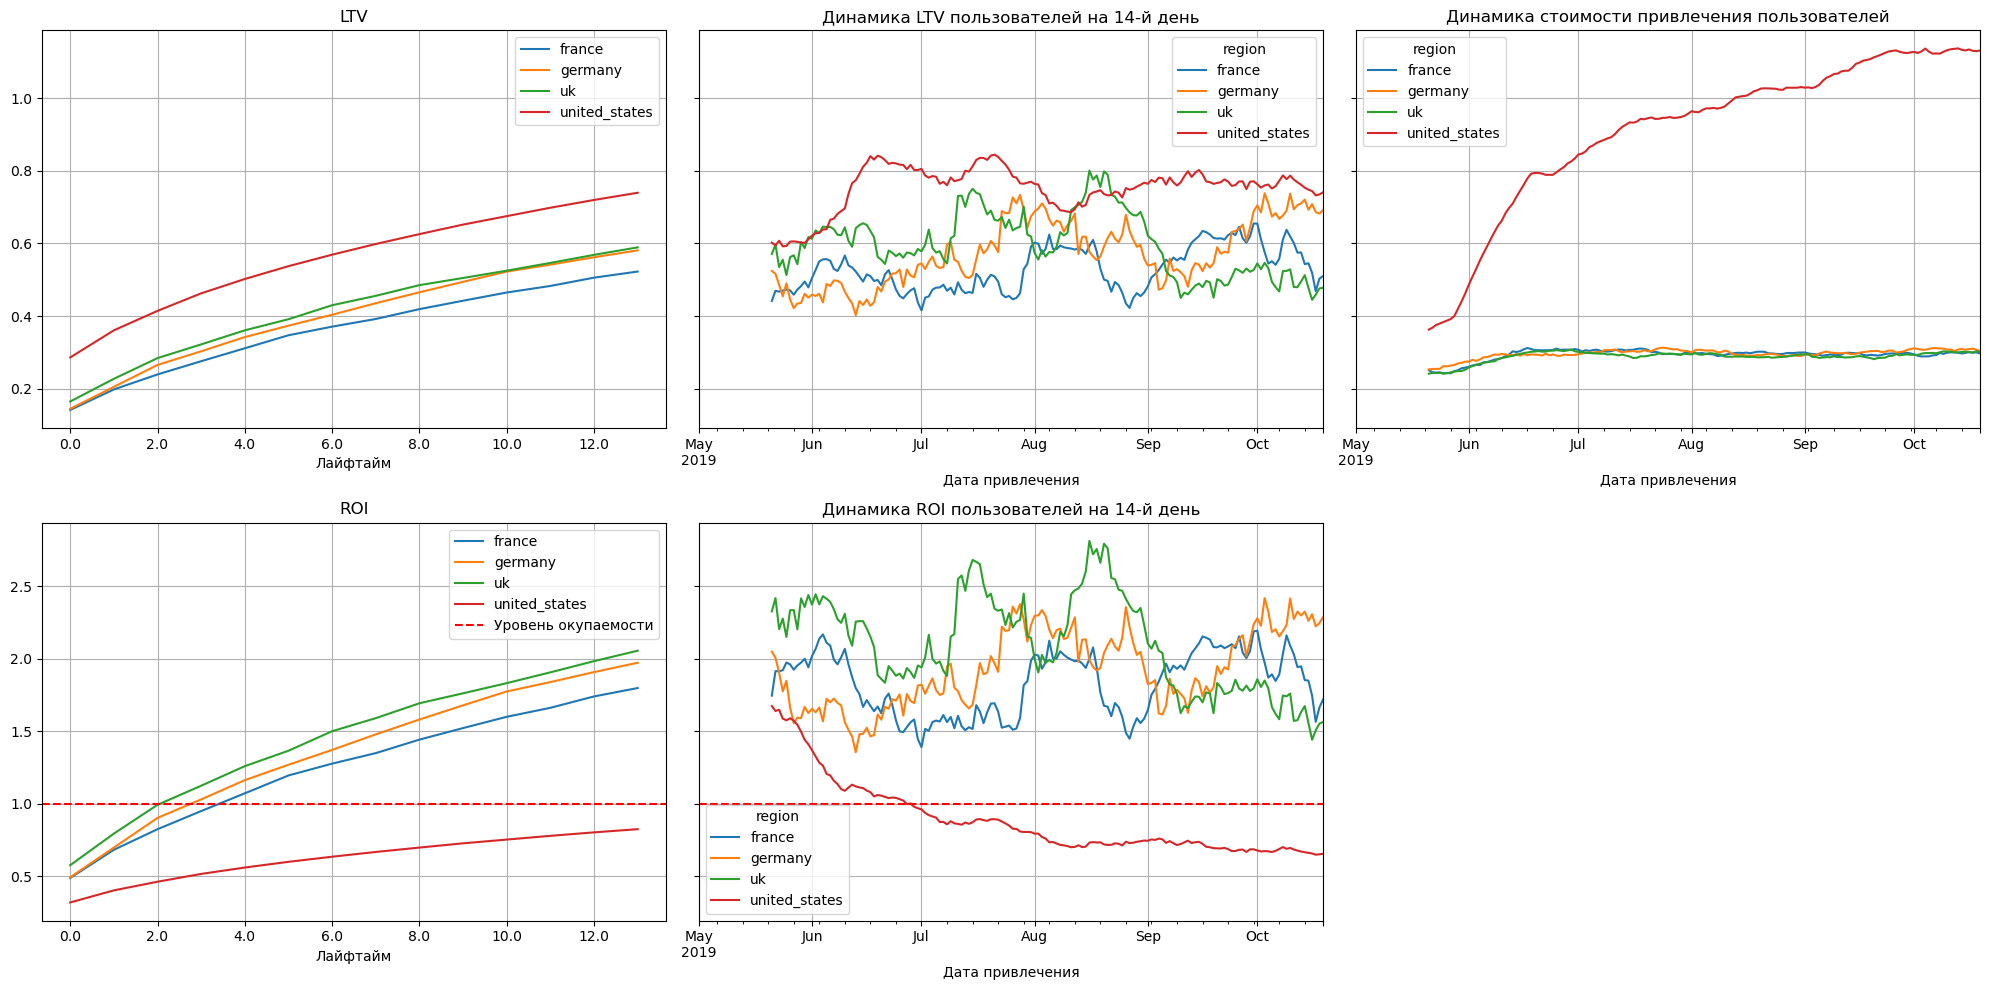

In [143]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=21) 

По графикам видим, что:

Картина в разбивке по странам дает более интересную информацию.

LTV для клиентов из США выше европейских примерно на четветь (75 к 58 центам).     
Однако эффект от этого "превышения" с лихвой "съедается" существенным удорожанием привлечения клиентов именно из США.   
В то время как стоимость привелечения клинтов из Европы оставалась на уровне около 30 центов на протяжении всего времени кампании, стоимость привлечения клиентов из США  увеличилась в почти в три раза ( с 40 центов до 1.15 доллара).             
То есть если в Мае "стоимость" Амерканского клиента была выше цены Европейца примерно на треть (37 к 25 центам), то в Сентябре эта разница достигла уровня почти 4 раза (1.15 доллара к 30 центам).    
Соответственно при более-менее стабильной динамике LTV динамика ROI для США очень быстро "уходит в минус" и "тянет за собой" общие показатели.    
Это довольно хорошо демонстрирует график ROI, где видно, что затраты в Европе начинают окупаться уже 2-3-го дня, а затраты в США даже близко не окупаются и через 2 недели.

Таким образом есть смысл уделить внимание эффективности привлечения клиентов из США, либо сделать в дальнейшем больший акцент на привлечение "более дешевых" европейских клиентов.

#### Проанализируем LTV и ROI в разбивке по устройствам.

Для этого так-же используем функцию get_ltv_roi(), дополнив параметр "dimensions" значением "device" и функцию plot_ltv_roi() для построения графиков.

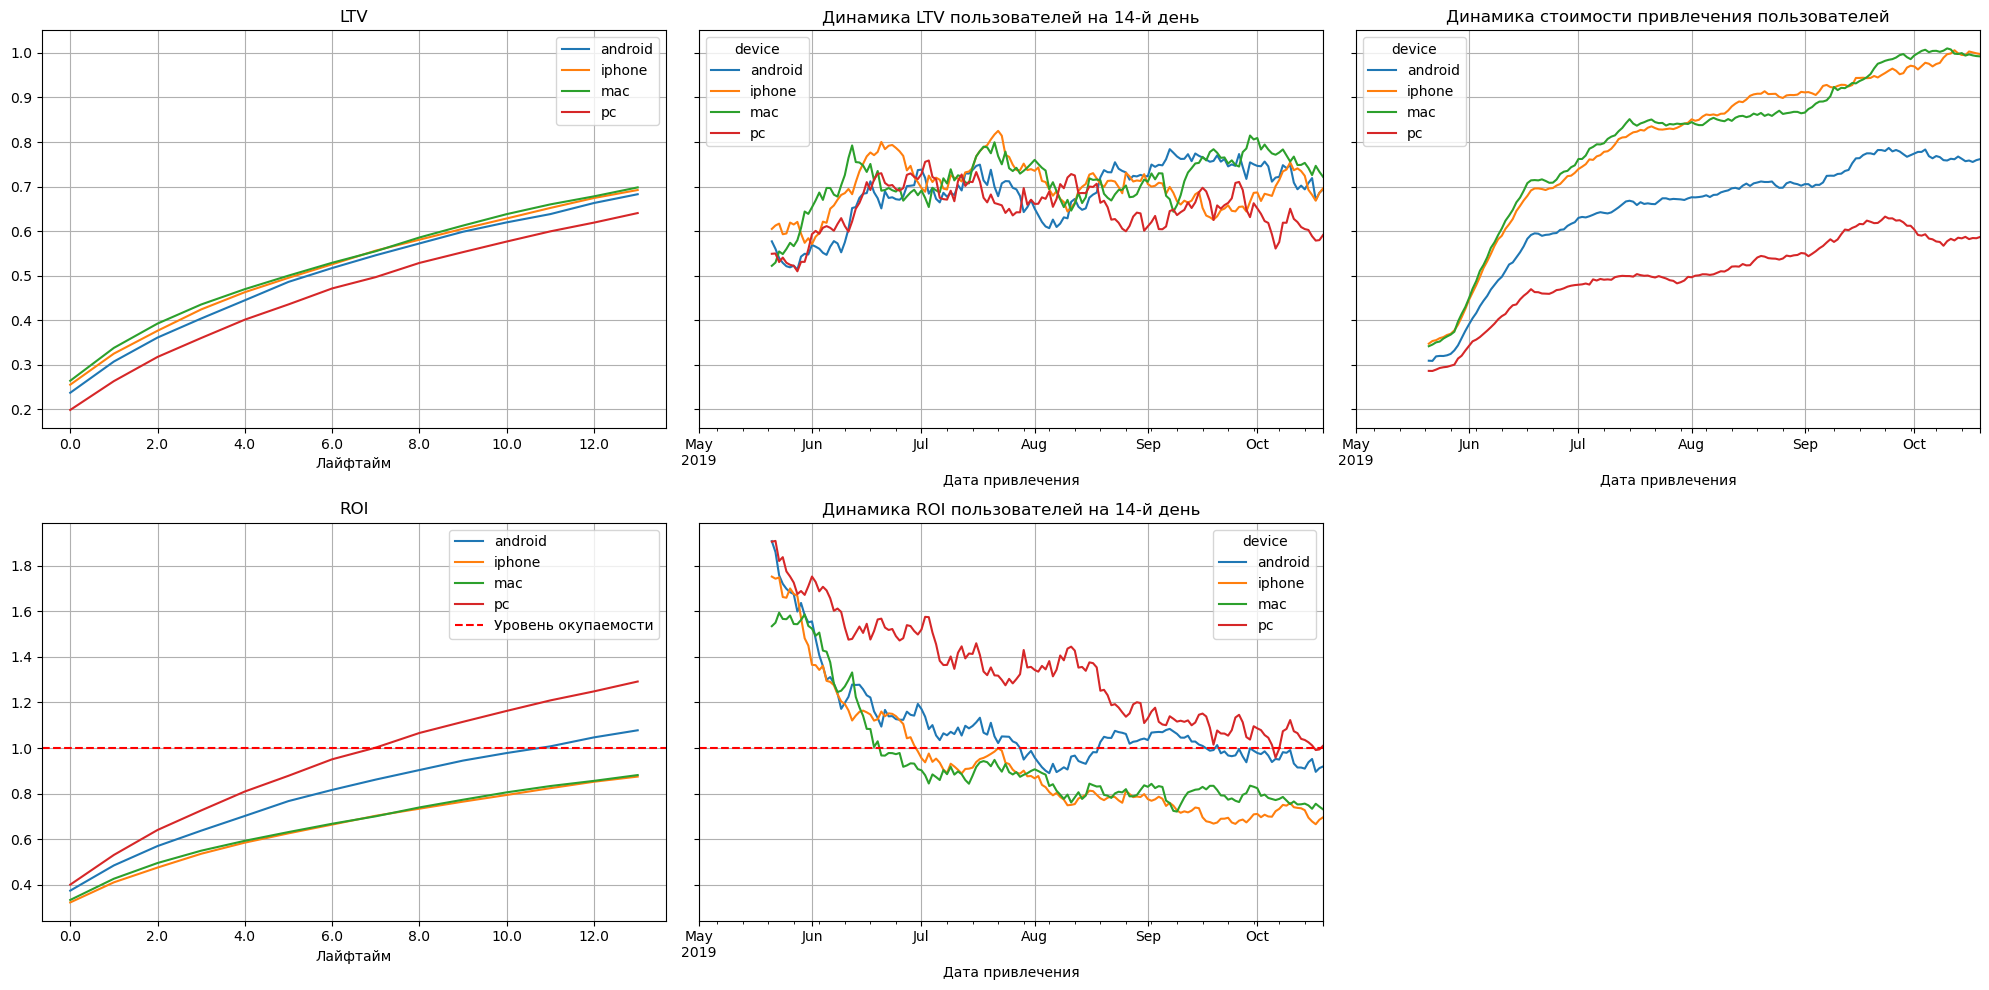

In [144]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=21) 

В разбивке по устройствам видим, что:

С точки зрения LTV пользователи мобильных устройств (Андроидов и Айфонов) и компьютеров от Apple показывают практически одинаковую LTV по дням. Доходность же обладателей PC  несколько ниже (на 14 день - на 0.1).    

Динамика LTV у всех категорий пользователей хоть и волатильна, но стабильна и не демонстрирует отчетливой тенденции ни к росту ни к снижению.       

А вот стоимоть привлечения клиента (CAC) имеет явную тенденцию к росту для всех категорий клиентов.         
В начале кампании все категории клиентов имеют примерно одинаковый САС.           
Однако по с ходом времени видно, что для владельцев продукции Apple тенденция к росту стоимости выражена гораздо более отчетливо: разница между стоимотью привлечения  в начале кампании и в конце отличается практически в 3 раза (35 центов в Мае и 1.0 доллар в Октябре).       
Обладатели РС имеют меньший "набор стоимоти" по мере развития кампании: отличие октябрьских значений от майских составляет два раза (около 60 центов в Октябре против примерно 30 центов в Мае)
Владельцы Андроид устройств занимают некое "промежуточное" положение: у них рост САС со временем составляет около 2.5 раз ( 75 центов в Октябре против 30 центов в Мае).

Именно тенденция увеличения стоимости привлечения клиентов при относительно стабильном певедении LTV со временем диктует тенденцию снижения ROI по мере развития проекта. При этом все категории клиентов за исключением разве что владельцев РС "уходят" ниже уровня окупаемости пратически в течение первого месяца кампании.

На графике ROI видно, что на 14-й день только владельцы РС  и Андроид-смартфонов выходят выше уровня окупаемости, в то время как пользователи Айфонов и Мас-ов не перваливают через уровень 0.9.

Таким образом наиболее "дорогими" клиентами являются пользователи продукции Apple.

#### А теперь посмотрим на возможно самое интересное - динамику параметров окупаемости в зависимости от канала привлечения.

Используем те же функции, выставив параметр "dimensions" в положение "channel".

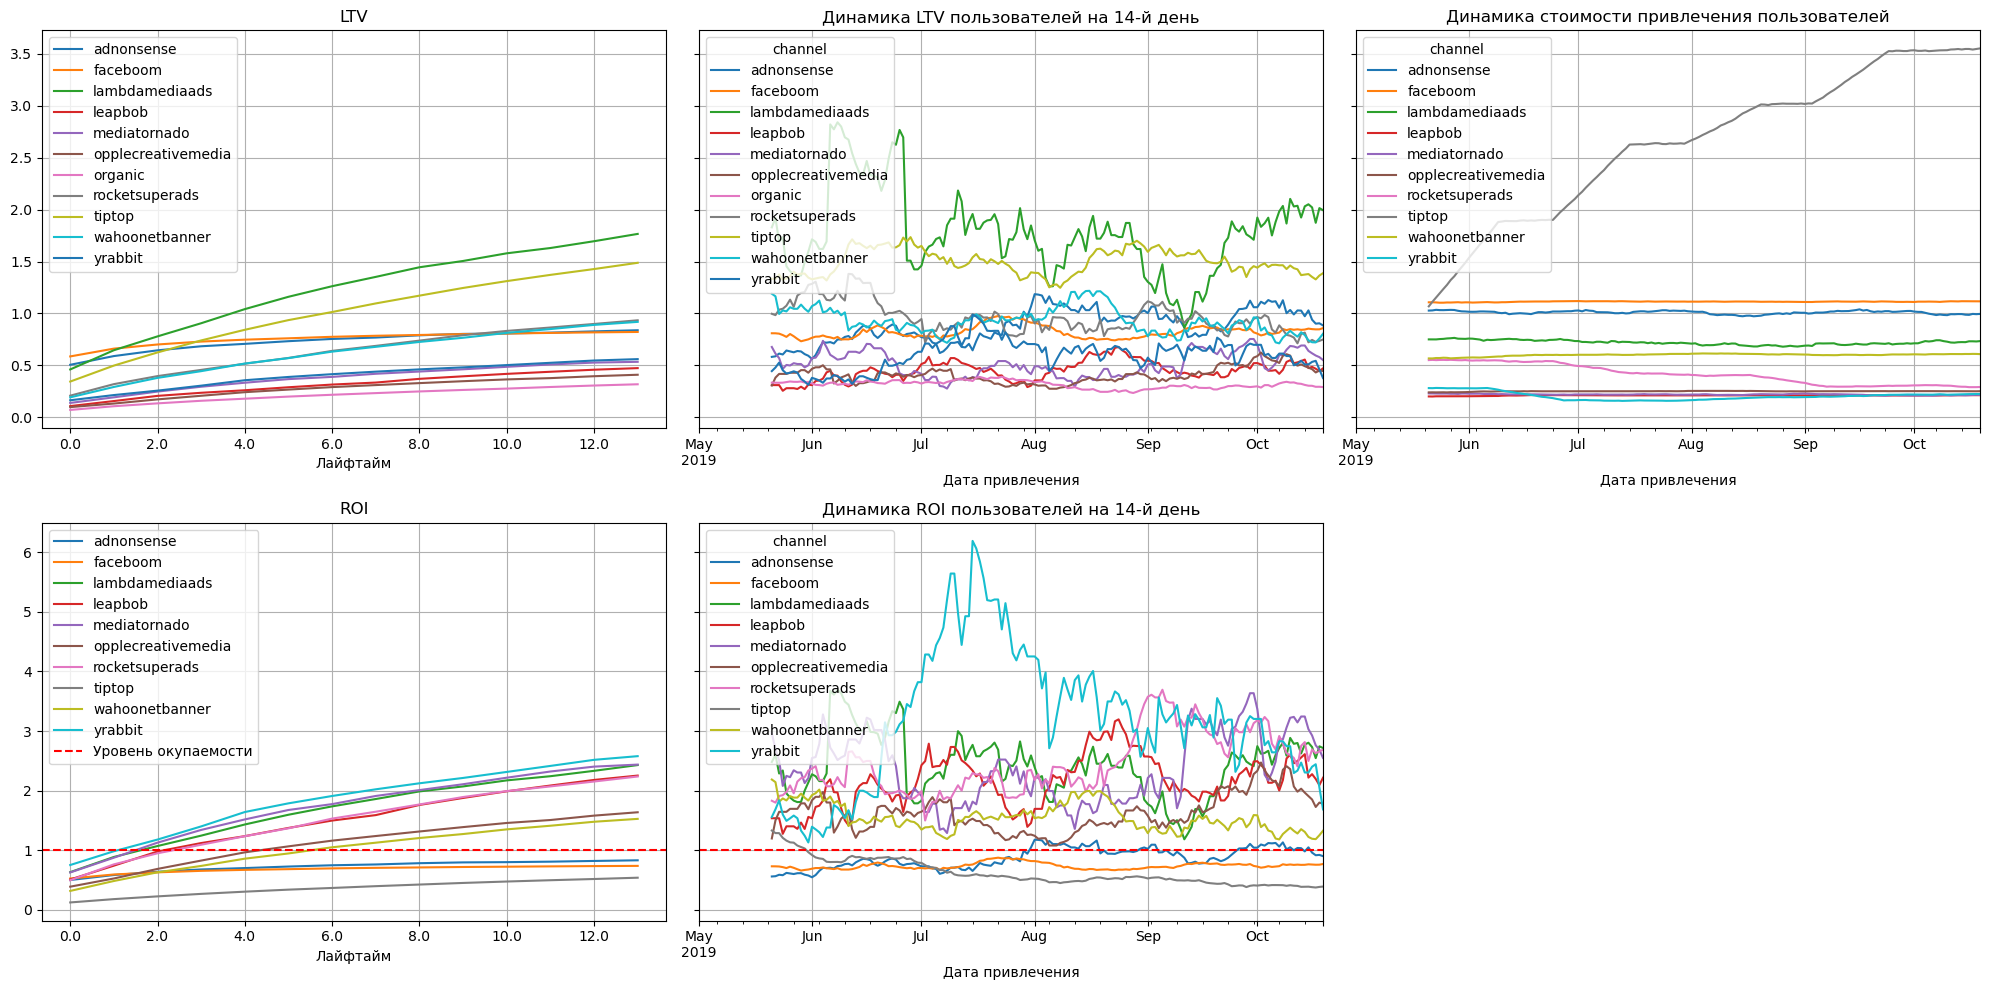

In [145]:
# смотрим окупаемость с разбивкой по каналам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=21) 

По каналам привлечения видим, что:

В основном графики LTV, CAC и ROI подтверждают наши предположения, сделанные ранее при анализе затрат в разбивке по каналм привлечения.

С точки зрения LTV видно, что источники привлечения делятся на три части:       
- компании "lambdamediaads"(Евр) и "tiptop"(США), которые на 14 день имеют LTV своих клиентов, существенно превышающую показатели клиентов других компаний - 1.7 и 1.5 доллара соответственно против прим. 0.95 у ближайших конкурентов;
- компании, у клиентов которых LTV на 14 день достигает порядка 90-95 центов, что примерно на 60% ниже, чем у лидеров, но в то же время почти вдвое выше, чем у остальных компаний. В эту группу входят 4 компании: "wahoonetbanner"(Евр), "rocketsuperads"(США), "faceboom"(США) и "adnonsense"(Евр). При этом первые две из них демонстрируют впечатляющую динамику набора LTV по дням лайфтайма: от 20-25 центов в первый день до 90-95 центов в 14 день. Две другие демонстрируют незначительный рост - 50-60 до 85-90 центов;
- группа из четырех компаний, котрые можно назвать "остальные". Они достигают уровня LTV в 40-50 центов на 14 день с уровня примерно 20 центов в первый день.

График динамики затрат на клиента (САС) довольно четко разделяет все каналы на следующие четыре группы:          
- компания "tiptop"(США) (напомним - общие затраты на этот канал максимальны и составляют 51.9% от всех затрат), которая демонстрирует абсолютно отличное от других поведение стоимости привлечения клиента по ходу развития проекта. У всех остальных компаний параметр САС остается стабильным на протяжении исследуемого полугода, в то время как у компании "tiptop" этот параметр растет, и не просто растет, а растет скачками каждый месяц (похоже это время выделения очередного транша финансирования) и начинаясь в Мае с уровня ок. 1 доллара за клиента достигает в Октябре уровня аж 3.5 доллара. Такой вид кривой САС у этой компании на фоне стабильности у всех остальных наводит на нехорошие подозрения в нечистоплотной игре со стороны этой компании;             
- вторая ргуппа - это компании "faceboom"(США, 30.8% общих затрат) и "adnonsense"(Евр, 3.7%) которые демонстрируют стабильный уровень затрат около 1.1 доллара;           
- в третью группу входят так-же две компании - "lambdamediaads"( Евр, 1.5% затрат) и "wahoonetbanner"(Евр, 4.9%) у которых уровень затрат на клиента так же стабилен и составляет примерно 60-70 центов;          
- остальные пять компаний с общим "весом" в сумманых расходах в 7.2%. Они показывают стабильный уровень САС на протяжении всей кампании привлечения на уровне примерно 20 центов на клиента, что при расчете на Октябрь в три раза ниже, чем у третьей группы, в 5 раз ниже, чем у второй и в 17.5 раз ниже, чем у "tiptop". При этом компания "yrabbit"(США, всего 0.9% от общих затрат) демонстрирует даже снижение уровня стоимости привлечения в пределах 5 центов.

В результате такой конфигурации поведения LTV и CAC на графике ROI мы видим, что каналы группируются в три отчетливые группы:        
- группа, которая не достигает окупаемости на 14 день. Она состоит из трех компаний "tiptop"(США) с уровнем ROI на 14 день на уровне около 60%, "faceboom"(США) с ROI около 80% и "adnonsense"(Евр) с уровнем 90%. Отметим, что это те самые каналы, которые демонстрируют самые высокие уровни САС на Октябрь (3.5, 1.1 и 1.05 доллара соответственно). При этом суммарно в эти каналы "закачано" 86.4% всего рекламного бюджета;         
- пара компаний - "wahoonetbanner"(Евр) и "opplecreativemedia"(Евр), коотрые на 14 день превышают уровень окупаемости в полтора раза ( ROI = 1.5-1.6). Отметим, что через эти компании прошло около 7% рекламного бюджета;      
- остальные 5 компаний, через которые суммарно прошло около 6.6% бюджета и которые демонстрируют вполне "здоровое" поведение - уровень ROI у этих компаний составляет на 14 день 2.2-2.3.

С точки зрения динамики LTV и ROI пожалуй можно отметить только то факт, что у компаний "lambdamediaads" (по LTV) и "yrabbit" (по ROI) поведение парметров значительно более волатильно, нежели у других компаний. Однако не зная больше деталей выводы здесь сделать сложно: вполне возможно, что это связано с относительно небольшими общими объемами привлечения у этих компаний. 

Таким образом уже можно констатировать, что распределение бюджета в этой полугодичной кампании привлечения клиентов по всей видимости было далеко от оптимального: более 86%  бюджета было потрачено на каналы, которые не выходят на окупаемость прежде всего из-за относительно высоких затрат на привлечение клиента (САС). При этом больше половины бюджета было аллокировано на канал, динамика САС в котором значительно отличается в негативную сторону от поведения САС для всех других каналов. 

И даже вторая по объему освоенного бюджета компания имела второй по дороговизне уровень стоимости привлечения клиентов и так-же не выхводила проект на окупаемость в своей части.

Так-же становится понятно, почему мы констатировали исходя из графика ROI по странам, что затраты в Европе начинают окупаться уже 4-6-го дня, а затраты в США даже близко не окупаются и через 2 недели. Это происходит потому, что 96% средств бюджета привлечения, аллокированных на США (доля которых в свою очередь составляет 86.2% всего бюджета) расходовалось на на два канала, демонстрирующих самый высокий среди всех показатель стоимости привлечения и не выходящих даже близко на окупаемость.           
Кроме того, второй крупнейший канал для Европы - компания "adnonsense", осваивающая 27% европейского бюджета так-же демонстрирует один из самых высоких уровней САС и не выходит на окупаемость.     
По всей видимости эти факторы и является основным источником проблем с окупаемостью проекта у компании Procrastinate Pro+. 

### Общие выводы:

Проект заказан компанией - разработчиком развлекательного приложения Procrastinate Pro+.        
Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.     
#### Была поставлена задача — разобраться в причинах убытков заказчика и дать рекомендации по выходу в плюс.       
Необходимо было проанализировать:              
•	откуда приходят пользователи и какими устройствами они пользуются,              
•	сколько стоит привлечение пользователей из различных рекламных каналов;            
•	сколько денег приносит каждый клиент,         
•	когда расходы на привлечение клиента окупаются,          
•	какие факторы мешают привлечению клиентов.

#### Компанией были предоставлены данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
Информация была предствлена в трех датасетах:   
•	лог сервера с данными об их посещениях, включая страну пользователя, тип устройства  скоторого он вошел, канал (источник) перехода, дату и время начала и окончания сессии;           
•	выгрузка клиентских покупок за этот период, включая дата, время и сумму покупки;         
•	рекламные расходы, включая дату проведения рекламной кампании, канал (источник) и сумму расходы на эту кампанию. 

Представленные датасеты содержали информацию о 309901-м сеансе посещения, данные о 40212-ти покапках и 1800 проведенных рекламных кампаниях через 10 каналов.          
В целом представленная выборка была полна и репрезентетивна. Пропусков нестыковок и возможных ошибок не выявлено. 

#### 1. Была проведена необходимая предобработка данных для проведения анализа:
Были             
•	приведены в порядок наименовния столбцов;           
•	обработаны "строковые" столбцы;             
•	преобразованы типы данных в столбцах с временными метками;           
•	проверены и обработаны пропуски и явные и неявные дубликаты.

#### 2. На основе наработок теоретической части были подготовлены  функции для расчета и визуализации основных параметров окупаемости маркетинговых активностей:    
Были "заготовлены" функции расчета и визуализации параметров LTV, САС, ROI, удержания и конверсии.

#### 3. Были составлены и проанализированы профили пользователей. 

###### Выявлено следующее:   

3.1. Дата привлечения первого пользователя 1 Мая 2019 года, дата привлечения последнего в наборе данных пользователя 27 Октября 2019 года. Таким образом общая длительность кампании привлечения составляет 5 месяцев и 27 дней или примерно пол-года. 

3.2. За рассматриваемый период было привлечено суммарно 150'008 новых пользователей. Из них плательщиков (то есть людей, которые совершили покупки на ресурсе) - 8'881 человек. Таким образом доля плательщиков составляет 5.92%.      

3.3. Стран, в которых проводилось привлечение и из которых пользователей заходили в приложение оказалось всего 4: США, Британия, Франция и Германия.

3.4. Устройств, с которых пользователей заходили в приложение так-же оказалось 4: Андроид-сматрфоны, Айфоны, компьютеры РС и компьютеры МАС.

3.5. Каналы, из которых пользователи "приходили" в приложение подразделяются на 'organic' (то есть "самопришедших" клиентов) и 10 различных рекламных агенств (привелекающих "платных" клиентов).

3.6. Были сделаны априорные предположения "наиболее естественного" возможного распределения клиентов по регионам (США и Европа) и по используемым устройствам, исходя из демографии и конфигурации рынка устройств. Было сделано предположение, что при равномерном прониктовении на рынки указанных выше стран следует ожидать примеро следующее распределение клиентов:

    - по регионам: 60% клиентов будут жители США и 40% - из стран Европы;
    
    - по устройствам, с которых они заходят в приложение: Андроид-смартфоны - 30%, Айфоны - 30%, РС - 30% и МАС - 10%.
    
Если в процессе исследования мы увидим значительные отклонения по регионам или по устройствам - эти соображения могут стать основой для рекомендацияй по "гармонизации" маркетинговой активности.       

3.7. Распределение пользователей по странам и по устройствам показало следующее:

    - распределение количества пользователей по странам таково: две трети или 66.7% - из США, на Британию и Францию приходится по 11.7% и 9.9% приходится на Германию. В сравнении с нашим "представлением о гармонии" (предыдущий пункт) такие проценты выглядят вполне нормальными - чуть больший приоритет США (на 6.7 %) скорее даже благоприятен;
    
    - распределение плательщиков по странам демонстрирует доминирование плательщиков из США: их 77.7%. Остальные страны распределены куда более равномерно: 7.9% - в Британии, 7.5% - во Франции и 6.9% - в Германии. 

Таким образом в США доля плательщиков составляет 70%, а для европейских стран эта доля равна примерно 40%. Это означает, что США гораздо выгоднее с точки зрения привлечения клиентов и вполне может быть и дальше приоритетом; 

3.8. Распределение количества пользователей по устройства показало:

    - что наибольшее количество клиентов заходит в приложение с Айфонов - таких пользователей 36.3%. Остальные две трети пользователей распределены практически равномерно: 23,5% приходится на владельцев Андроид-смартфонов и по 20.1%  - на обладателей компьютеров (MAC и PC). По сравнению с нашей "идеальной картинкой" мы видим определенный перекос в сторону пользователей яблочных устройств. Можно предположить, что это результат большей доли США в распределении и большей популярности Apple именно в штатах;
    
    - распределение плательщиков по устройствам в чем то повторяет распределение общего количества пользователей: на Айфоны приходится 38.1%, на Андроиды - 23.1%, на MAC - 21.5% и наконец на PC - 17.3%. При этом доля плательщиков из общего количества пользователей для пользователей Apple несколько выше, чем для остальных: у MAC она 6.4%, у Айфонов - 6.2%, в то время как для Андроида она составляет 5.9%, а для для PC 5.1%. Так что определенный перекос (вполне возможно естественный как мы предположили в предыдущем пункте) в сторону яблочных устройств не является чем-то снижающим эффективность.

3.9. Кроме было построено совмещенное распределение клиентов по странам и по устройствам. Оно показало, что рынки Америки и Европы в какой-то степени дополняют друг друга (с неким все-же перевесом в сторону США) в части большей склонности клиентов в США к гаджетам от Apple, а в Европе - к более открытым и демократичным Андроидам и РС.

3.10. Распределение количества пользователей по каналам привелечения показало:

    - наибольшее количество клиентов приходят сами по себе, без всякой рекламной "подсказки" - это категория "organic". Однако доля плательщиков в этом канале самая низкая из всех (2.1%), хотя количество плательщиков все-таки довольно велико: 1160 человек, что является третим результатом;
    
    - в географическом аспекте мы видим, что соотношение органических клиентов (то есть пришедших по каналу "organic") в США и в Европе примерно 2 к 1 (38,1 тысяча "самопришедших" клиентов в США к 18,3 тысяче "самопришедщих" клиентов в Европе). Это практически такое же соотношение, что и для "платных" клиентов (61.8 тысяч платных клиентов в США на 31.7 платных клиентов в Европе) и соответственно - для всех клиентов (100 тысяч на 50 тысяч);
    
    - у рекламных агенств, сотрудничающих с Procrastinate Pro+ на ниве привлечения "платных" клиентов имеется очень четкая региональная специальзация: 5 компаний работет на рынок США и 5 компаний - на рынок Европы;
    
    - лидерами среди "рекламных" каналов являются две компании "faceboom" и "tiptop", дающие напару 52% "рекламных" (без учета органики) пользователей (48705 из 93569) и 70% "рекламных" плательщиков (5435 из 7721). Обе эти компании работают на рынке США. Было сделано предположение, что такое явное лидерство обусловлено большим объемом средств бюджета, выделяемым именно этим агенствам;
    
    - остальные рекламные каналы существенно уступают двум лидерам по всем показателям: суммарно меньше половины "рекламных" пользователей и только 30% "рекламных" плательщиков. 
    
#### 4. Были проанализированы распределение и динамика изменения расходов на маркетинг (суммарно и на одного клиента - САС).

4.1. Суммарные затраты на привлечение пользователей - 105'497 долларов.

4.2. Распределение этих затрат по регионам таково:

    - затраты на привлечение пользователей из США - 90'928 долларов, 
    - а затраты на привлечение пользователей из Европы - 14'569.
    
То есть затраты, аллоцированные на рынок США составляют 86.2% всего бюджета на рекламу, в то время как Европе остается только 13.8%. С учетом того, что (как мы отмечали ранее в п. 3.7) США дают только 77.7% плательшиков (которые собственно и приносят заказчику доход) уровень затрат 86 процентов видится завышенным.

4.3. Изучение динамики изменения расходов по регионам показало, что суммарные затраты в регионе США не просто выше ( что мы уже отмечали ранее), но они еще и демонстрируют существенный (в 2.5 раза) рост с мая по сентябрь включительно, в то время как затраты на каналы в Европе не показывают роста совсем.

4.4. Распределение суммарных затрат по рекламным агенствам показало следующие:

    - как мы и предполагали львиную долю расходов на рекламу получили компании "faceboom" и "tiptop", работающие на американском рынке и преимущественно с пользователями гаджетов от Apple. Суммарно на них было аллоцировано 82% рекламного бюджета. При этом, что с точки зрения привлечения эти две компании дали напару только 52% "рекламных" (без учета органики) пользователей и 70% "рекламных" плательщиков;
    
    - явным лидером по затратам является компания "tiptop"- на нее было аллоцировано аж 51% рекламного бюджета. А показатели привлечения у нее довольно скромные: 21% среди "рекламных" пользователей и 24% плательщиков.
    
Была высказана гипотеза, что этот канал как минимум менее эффективен, чем многие другие имеющиеся в наличии;

    - остальные каналы существенно уступают этим двум по доле бюджета: на ближайшего преследователя - компанию "wahoonetbanner" (а это крупнейший партнер на европейском рынке) было аллоцировано всего около 5% рекламного бюджета;
    
    - рекламные компании, находящиеся на местах с 5-го по 10-е "потребляют" от 1.5% до 2% рекламного бюджета каждая. При этом привлекая от 4% до 9% пользователей.
    
4.5. Анализ динамики изменения расходов по рекламным каналам показал, что две компании-"лидера" - "faceboom" и "tiptop" не просто расходовали львиную долю рекламного бюджета, но и в отличие от остальных каналов последовательно наращивали уровень затрат с мая по сентябрь включительно, выходя на платто лишь в октябре.

4.6. В среднем привлечение одного пользователя ( параметр CAC) стоило заказчику 69 центов.

4.7. Распределение этого параметра по регионам таково:

    - средняя стоимость привлечения клиента из США - 95 центов, 
    - средняя стоимость привлечения клиента из Европы - 56 центов.
    
То есть затраты на привлечение одного клиента из США в 1.7 раза выше, чем на клиента из Европы. САС для США выше среднего на 26 центов, а для Европы - ниже среднего на 13 центов.

4.8. Распределение параметра САС по рекламным каналам показывает следующие:

    - оба "лидера" по расходам бюджета - компании "faceboom" и "tiptop", котрые освоили 82% рекламного бюджета имеют САС существенно выше среднего;
    
    - компании "tiptop" показывает максимальный САС. Отношение к среднему для этого канала составляет 2.80 к 0.69, то есть в этом канале САС в 4.1 раза выше, чем в среднем по всем каналам и в 5 раз выше чем в Европе.
    
Таким образом высказанная ранее гипотеза, что этот канал как минимум менее эффективен, чем многие другие имеющиеся в наличии нашла подтверждение. Работая с этим каналом заказчик расходовал 52% рекламного бюджета с эффективностью привлечения в 4 раза ниже средней.

    - с другой стороны лучшие показатели по затратам на одного клиента ( с примерно одинаковыми уровнями затрат) показали следующие 3 компании: "yrabbit" (22 цента), "mediatornado" (22 цента) и "leapbob" (21 цент). Показатель САС у этих компаний ниже среднего в 3 раза. Сопоставимые с ними показатели так-же имеет "opplecreativemedia" (25 центов).
    
При этом компания "mediatornado" работает на Американском рынке и может рассматриваться как прямой конкурент "лидерам",    
а компании "leapbob" и "opplecreativemedia" работают в Европе и могут рассматриваться как некая перспектива с точки зрения региональной диверсификации.

#### 5. Была проведена оценка окупаемости рекламы.

При расчете показателей эффективности и оценке окупаемости рекламной кампании делались следующие предположения:

    - в соответвтсвии с условиями, данными заказчиком в описании проекта, считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения;
    
    - учитывая тот факт, что по всей видимости ситуация с окупаемостью проекта у заказчика напряженно, а канал "organic" вносит опреленный вклад в приток клиентов и "ведет себя" сходно с большинством "платных" каналов привлечения мы не стали исключать канал "organic" из рассмотрения.

##### 5.1. Были расчитаны и проанализированы параметры удержания пользователей.   

5.1.1. Интегральные графики удержания пользователей показали, что:

    - уровень удержания для плательщиков с уровня 40% в первый день плавно снидается до уровня 12% на 14 день. При этом динамика удержания на 14 день среди плательщиков показывает колебания (возможно сезонные) снижаясь с 15% в начале Июня до 10% в Июле и Августе, затем несколько увеличиваясь до 13% в Сентябре - начале Октября;
    
    - для неплатящих клиентов уровень удержания уже в первый день составляет только 17% и существенно быстрее падает практически до нуля к 14 дню.
    
То есть показатели удержания платящих клиентов существенно превосходят показатели для неплатящих.

5.1.2. Анализ удержания пользователей в разбивке по странам показал, что:

    - уровень удержания для платящих пользователей из Европейских стран плавно снижается с 49-50% в первый день до уровня 17-19% на 14 день;
    
    - в то время как платящих клиентов из США уровень удержания в первый день составляет только 37% и снижается к 14 дню до уровня 10%;
    
Таким образом разница в уровнях удержания на 14-й день составляет 7-9% "в пользу" европейских платящих клиентов.

    - динамика удержания на 14 день среди плательщиков показывает, что у пользователей из Европы существенно более высокая волотильность колебаний. Тем не менее уровень удержания для них практически ни в какой период не снижается ниже уровня удержания для клиентов из США;
    
    - показатели удержания неплатящих клиентов практически не отличаются по странам, экспанециально снижаясь с уровня 17% в первый день практически до нуля уже к 7-8 дню. При этом динамика по неплательщикам не показывает различий по странам оставаясь околонулевой на протяжении всего срока кампании.
    
5.1.3. Изучение влияния каналов привлечения на удержание пользователей показало, что:

    - картина с неплатящими пользователями остаётся стабильной: ноль не зависит ни от чего;
    
    - плательщики, привлеченные через компании "faceboom" (один из двух явных лидеров по объему бюджета на американском рынке) и "adnonsense" (лидер на европейском рынке) обладают существенно меньшим уровнем удержания, чем клиенты, привлеченные через остальные каналы. Разница в уровне сохраняется довольно значительной с первого по 14 день примерно на уровне 20%. При этом такой существенно меньший уровень удержания сохраняется на протяжении всего полугодичного интервала;
    - все остальные каналы привлечения (включая органических клиентов) сгруппированы довольно плотно, "стартуя" с уровня 50-57% в первый день и "финишируя" с показателями 10-22% на 14 день.
    
Таким образом с точки зрения удержания два из трех лидеров по по объему бюджета показали существенно худшший уровень удержания на протяжении всего полугодичного интервала по отношению не только к остальным "платным" каналам, но даже к "органику".   

##### 5.2. Были расчитаны и проанализированы параметры конверсии пользователей (перехода в категорию плательщиков).    

5.2.1. По интегральному графику конверсии пользователей видно, что: 

    - уровень конверсии из пользователей в плательщики возрастает в логарифмическом темпе от уровня 4.2% в первый день до уровня в 5.5% на 14-й день;
    
    - динамика конверсии показывает резкий рост уровня конверсии на 14 день в Июне с уровня 4.6% до уровня около 6.0% и затем сохраняется примерно на этом уровне в течение всего срока кампании с колебаниями вокруг него в пределах +-0.4%.

5.2.2. Анализ конверсии в разбивке по странам показал, что: 

    - уровень конверсии для США значительно - в 1.6-1.7 раза выше, чем в Европе ( 6.8% против 3.8-4.0%);
    
    - Динамика конверсии показывает 
        - для рынка США резкий рост уровня конверсии на 14 день в Июне с уровня 5.0% до уровня около 7.0% с последующим сохранением этого уровня в течение всего срока кампании с колебаниями вокруг него в пределах +-0.4%,
        - для всех трех стран Европы стагнацию конверсии на уровне около 4% на протяжении всего полугодичного периода с колебаниями вокруг отметки 4% с амплитудой примерно +-1.2%.
        
5.2.3. Аналогичный анализ конверсии в разбивке по используемым клиентами устройствам показал, что: 

    - уровень конверсии для пользователей РС составляет 4.8% и уступает уровням конверсий для пользователей остальных трех устройств:
        - против 5.4% у Андроид-сматрфонов, 
        - против 6.0% у пользователей Айфонов 
        - и 6.2% у владельцев МАС-ов;
        
    - Вид графиков динамики конверсии у всех групп примерно один и тот-же: рост в период конец Мая - Июнь с 4.2-4.8% до уровня от 4.8-5.0% у РС и около 6.0-6.5% у остальных гаджетов, затем колебания вокруг этих значений с амплитудой около +-1%. 

5.2.4. Изучение влияния каналов привлечения на уровень конверсии пользователей в плательщики показало, что:

    - ожидаемо самый низкий уровень конверсии - на уровне около 2% - у органических клиентов;
    
    - среди "платных" каналов можно примерно выделить четыре группы:
        - лидер - компания "faceboom" (представитель рвнка США) с уровнем конверсии на 14-й день в 12%, что боле чем в двое превосходит среднюю конверсию на 14-й день по всем каналам,
        - преследователи с уровнем конверсии на 14-й день близким к 10%. Это три компании: "adnonsense" ( европейский рынок) с уровнем конверсии 10.7%, "lambdamediaads" ( европейский рынок) с уровнем конверсии в 10.2% и "tiptop" ( американский рынок) с уровнем 9.5%,
        - серднячки с уровнем 5-8% - это компании "rocketsuperads" ( американский рынок) с уровнем конверсии в 7.5% и "wahoonetbanner" ( европейский рынок) с уровнем 5.2%,
        - ну и наконец 4 компании, которые можно записать в отстающие по показателю конверсии. Это компании: "yrabbit" ( амер.) с уровнем 3.7%, "mediatornado" ( амер.) с 3.4%, "leapbob" ( евр.) с 3.0%, и "opplecreativemedia" ( евр.) - 2.8%.
        
Таким образом одной из трех "подозреваемых" в неэффективности платных каналов привлечения - компании "faceboom" удалось за счет высокой конверсии своих клиентов несколько улучшить показатели эффективности.

##### 5.3. Были расчитаны и проанализированы параметры LTV и ROI для всех доступных срезов клиентов: по странам, гаджетам и каналам.    

5.3.1. По интегральному графику LTV и ROI всех пользователей видно, что:

    - рост LTV по лайфтайму имеет ожидаемо логарифмический вид. Рост идет от уровня 10 центов в первый день до 68 на 14-й день;
    - ROI, "стартуя" в первый день с уровня примерно 35% в конце второй недели приближается, но все-же не достигает 100%;
    - с точки зрения динамики LTV показывает относительно стабильную динамику на протяжении всей длительности кампании колеблясь около 70 центов +- 10 центов;
    
    - как мы и отмечали ранее CAC увеличивается на протяжении проекта от уровня 32 центов в начале до 88 центов в Октябре;
    
    - такая динамика LTV и CAC влечет постепенное снижение ROI. При этом ROI остается в "положительной" (выше уровня окупаемости) зоне только в Мае и первой половине Июня, затем сваливаясь в "отрицательную" зону и оставаясь там до конца кампании с отрицательной при этом динамикой.
    
5.3.2. Анализ LTV и ROI в разбивке по странам показал, что: 

    - уровень LTV для клиентов из США выше европейских примерно на четветь (75 к 58 центам); 
    
    - эффект от этого "превышения" по LTV с лихвой "съедается" существенным более дорогой стоимотью привлечения клиентов именно из США: если в Мае "стоимость" Амерканского клиента была выше цены Европейца примерно на треть (37 к 25 центам), то в сентябре эта разница достигла уровня почти 4 раза (115 к 30 центам);
    
    - в результате на графике ROI хорошо видно, что затраты в Европе начинают окупаться уже 2-3-го дня, а затраты в США даже близко не окупаются и через 2 недели.
    
Таким образом нашла прямое подтверждение высказанная нами ранее гипотеза о том, что клиенты из США стоят заказчику слишком дорого и обладают низким уровнем удержания и что поэтому затраты в этой стране могут не окупиться даже при том, что уровень конверсии на этом рынке более чем в полтора раза выше, чем в Европе.       
Однако это вовсе не свидетельство того, что сам по себе рынок "плох", это скорее всего свидетельство того, что политика распределения рекламного бюджета заказчика на этом рынке плоха.

5.3.3. Аналогичный анализ LTV и ROI в разбивке по используемым клиентами устройствам показал, что:

    - с точки зрения LTV пользователи обоих типов мобильных устройств, как и пользователи компьютеров от Apple показывают практически одинаковую LTV по дням - около 70 центов на клиента на 14 день. Доходность же обладателей PC несколько ниже -  63-64 цента на 14-й день;
    
    - динамика LTV у всех категорий пользователей хоть и волатильна, но стабильна и не демонстрирует отчетливой тенденции ни к росту ни к снижению;
    
    - а вот стоимоть привлечения клиента (CAC) имеет явную тенденцию к росту для всех категорий клиентов. В начале кампании все категории клиентов имеют примерно одинаковый САС, однако с ходом времени видно, что
        - для владельцев продукции Apple ( айфонов и компьютеров МАС) тенденция к росту стоимости выражена гораздо более отчетливо: разница между стоимотью привлечения в начале кампании и в конце отличается практически в 3 раза (35 центов в Мае и 1.0 доллар в Октябре),
        - обладатели РС имеют меньший "набор стоимоти" по мере развития кампании: отличие октябрьских значений от майских составляет два раза (около 60 центов в Октябре против примерно 30-ти в Мае),
        - владельцы Андроид устройств занимают некое "промежуточное" положение: у них рост САС со временем составляет около 2.5 раза ( 75 центов в Октябре против 30-ти в Мае);
        
    - именно тенденция увеличения стоимости привлечения клиентов при относительно стабильном певедении LTV со временем диктует тенденцию снижения ROI по мере развития проекта. При этом все категории клиентов за исключением разве что владельцев РС "уходят" ниже уровня окупаемости пратически в течение первого месяца кампании;
    
    - на графике ROI видно, что на 14-й день только владельцы РС и Андроид-смартфонов выходят выше уровня окупаемости, в то время как пользователи Айфонов и Мас-ов не перваливают через уровень 90%.
    
Таким образом наиболее "дорогими" и наименее рентабельными для заказчика клиентами являются пользователи продукции Apple. В этом случае так-же оговоримся, что это не пользователи дороги, а вполне вероятно, что рекламная политика заказчика такова, что именно на этих клиентов тратится больше денег.

5.2.4. Изучение влияния каналов привлечения на основные показатели окупаемости и доходности позволяет утверждать следующее:

    - ожидаемо самый низкий LTV - на уровне около 30 центов на 14-й день - у канала "organic";
    
    - "платные" же источники привлечения делятся точки зрения LTV на три части:
        - компании "lambdamediaads"(Евр) и "tiptop"(США), которые на 14 день имеют LTV своих клиентов, существенно превышающую показатели клиентов других компаний - 1.7 и 1.5 доллара соответственно против прим. 95 центов у ближайших конкурентов,
        - компании, у клиентов которых LTV на 14 день достигает порядка 90-95 центов, что примерно на 60% ниже, чем у лидеров, но в то же время почти вдвое выше, чем у остальных компаний. В эту группу входят 4 компании: "wahoonetbanner"(Евр), "rocketsuperads"(США), "faceboom"(США) и "adnonsense"(Евр). При этом первые две из них демонстрируют впечатляющую динамику набора LTV по дням лайфтайма: от 20-25 центов в первый день до 90-95 центов в 14 день. Две другие демонстрируют незначительный рост - 50-60 до 85-90 центов,
        - группа из четырех компаний, котрые можно назвать "остальные". Они достигают уровня LTV в 0.4-0.5 на 14 день с уровня примерно 0.2 в первый день;
        
    - график динамики затрат на клиента (САС) довольно четко разделяет все каналы на следующие четыре группы:
        - компания "tiptop"(США) (напомним - общие затраты на этот канал максимальны и составляют 51.9% от всех затрат), которая демонстрирует абсолютно отличное от других поведение стоимости привлечения клиента по ходу развития проекта. У всех остальных компаний параметр САС остается стабильным на протяжении исследуемого полугода, в то время как у компании "tiptop" этот параметр растет, и не просто растет, а растет скачками каждый месяц (похоже это время выделения очередного транша финансирования) и начинаясь в Мае с уровня ок. 1 доллара за клиента достигает в Октябре уровня аж 3.5 доллара,
        - торая ргуппа - это компании "faceboom"(США, 30.8% общих затрат) и "adnonsense"(Евр, 3.7%) которые демонстрируют стабильный уровень затрат около 1.1 доллара,
        - в третью группу входят так-же две компании - "lambdamediaads"( Евр, 1.5%) и "wahoonetbanner"(Евр, 4.9%) у которых уровень затрат на клиента так же стабилен и составляет примерно 60-70 центов,
        - остальные пять компаний с общим "весом" в сумманых расходах в 7.2%. Они показывают стабильный уровень САС на протяжении всей кампании привлечения на уровне примерно 20 центов на клиента, что при расчете на Октябрь в три раза ниже, чем у третьей группы, в 5 раз ниже, чем у второй и в 17.5 раз ниже, чем у "tiptop". При эетом компания "yrabbit"(США, всего 0.9% от общих затрат на кампанию) демонстрирует даже снижение уровня стоимости привлечения в пределах 5 центов;
        
    - В результате такой конфигурации поведения LTV и CAC на графике ROI мы видим, что каналы группируются в три отчетливые группы:
        - группа, которая не достигает окупаемости на 14 день. Она состоит из трех компаний "tiptop"(США) с уровнем ROI на 14 день на уровне около 60%, "faceboom"(США) с ROI ок.80% и "adnonsense"(Евр) с уровнем 90%. Отметим, что это те самые каналы, которые демонстрируют самые высокие уровни САС на Октябрь (3.5, 1.1 и 1.05 доллара соответственно). При этом суммарно в эти каналы "закачано" 86.4% всего рекламного бюджета,
        - пара компаний - "wahoonetbanner"(Евр) и "opplecreativemedia"(Евр), коотрые на 14 день превышают уровень окупаемости в полтора раза ( ROI = 1.5-1.6). Отметим, что через эти компании прошло около 7% рекламного бюджета;
        - остальные 5 компаний, через которые суммарно прошло около 6.6% бюджета и которые демонстрируют вполне "здоровое" поведение - уровень ROI у этих компаний составляет на 14 день 2.2-2.3.
        

#### Заключение и рекомендации заказчику:

##### Можно констатировать, 

Основой проблем заказчика с окупаемостью кампании привлечения клиентов яявляется не доходностььклиентов, а их "дороговизна" - высокий уровень САС и его рост по ходу кампании.          
Причина этой "дороговизны" видится в том, что распределение бюджета в этой полугодичной кампании по всей видимости было далеко от оптимального: 

    - более 86% бюджета было потрачено на каналы, которые не выходят на окупаемость прежде всего из-за относительно высоких затрат на привлечение клиента (САС);
    
    - при этом больше половины бюджета было аллокировано только на один канал - компанию "tiptop". Это единственный канал, динамика САС в котором значительно отличается в негативную сторону от поведения САС для всех других каналов. Эти показатели вызывают подозрения подозрения в нечистоплотности пратнера или в коррупционной природе такого распределения бюджета. Однако такие подозрения не могут быть ни подтверждены в рамках настоящего проекта и требуют отдельного исследования силами заказчика. 

    - вторая же по объему освоенного бюджета компания имела второй по дороговизне уровень стоимости привлечения клиентов и так-же не выводила проект на окупаемость в своей части.

     - кроме того, второй по размеру бюджета канал для Европы (он же предпоследний из всех по количеству привлеченных пользователей) - компания "adnonsense", осваивающая 27% европейского бюджета  так-же демонстрирует один из самых высоких уровней САС и не выходит на окупаемость.

По всей видимости эти факторы и является основным источником проблем с окупаемостью проекта у компании Procrastinate Pro+.

По ходу исследования данные показывали, что затраты в Европе начинают окупаться уже 4-6-го дня, а затраты в США даже близко не окупаются и через 2 недели. Причина этому в том, что 96% средств бюджета привлечения, аллокированных на США расходовалось на описанные выше самые неэффективные каналы. Это означает, что выводы о "дороговизне" и "неокупаемости" в целом рынка США делать на основании только исследуемых данных нельзя. Это не рынок "плох", а распердение бюджета "нехорошо".

Возможно более равномерное распределение бюджета среди каналов и большее активное задействование более эффективных с точки зрения ROI компаний поможет вывести проект на окупаемость.

##### Таким образом рекомендации по исправлению ситуации могут быть следующие:

1. По возможности отказаться от услуг компании "tiptop" в продвижении услуг.

2. Перераспределить бюджет, выделяемый на США, снизив долю в нем компании "faceboom" по возможности до минимума в пользу имеющихся или новых более эффективных альтернатив. Из имеющихся такими альтернативами могут быть компании "rocketsuperads", "mediatornado" и "yrabbit".

3. Сохранять пропорцию между рынками (регионами) на уровне 65-70% - США и 30-35% - Европа. Среди Европейских стран приоритетность видятся следующей: сначала Британия, затем Франция и поле - Гурмания.  

4. Перераспределить бюджет, аллоцированный на Европу таким образом, чтобы минимизировать в нем долю компании "adnonsense" по возможности до минимума в пользу новых или имеющихся более эффективных альтернатив. Из имеющихся такими альтернативами могут быть прежде всего компании "lambdamediaads" и "leapbob". Но и компании "wahoonetbanner" и "opplecreativemedia" хоть и имеют несколько худшие показатели ROI нежели первые две, но на окупаемость уверенно выходят. 

5. Контролировать расходование бюджета по ходу следующей кампании, особое внимание уделяя эффективности работы каналов привлечения. В случае обнаружения стоимости каналов - оперативно перераспределять бюджет в пользу более эффективных каналов. Отдельно мониторить эффективность компаний "faceboom" и "adnonsense" (в случае выделения им боле-менее значимой части бюджета): получается ли у них оптимизировать работу и вывести свои каналы привлечения на окупаемость.

Такое перераспределение рекламного бюджета и контроль за ним наверняка помоут компании выйти на уровень окупаемости и  получать прибыль от приложения.


#### Проект выполнил Александр Кийко.
##### a.m.kiyko@yandex.ru

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отличная работа! Спасибо за работу, понравилась твоя погруженность, вовлеченность, удачи с достижением поставленных на Практикум целей!
    
</div>